# Constructing empirical PSFs of HST and JWST

In this tutorial, we will construct empirical PSFs of HST and JWST imaging using [Photutils](https://photutils.readthedocs.io/en/stable/). A more comprehensive tutorial and explanations can be seen at the [Photutil's website](https://photutils.readthedocs.io/en/stable/epsf.html).

In [1]:
import os, sys
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
from photutils.detection import find_peaks
from astropy.table import Table
from astropy.nddata import NDData
from photutils.psf import extract_stars
from photutils.psf import EPSFBuilder

%matplotlib inline

## List the input images

In [2]:
filters = ['hst_acs_f435w', 'hst_acs_f475w', 'hst_acs_f555w', 'hst_acs_f606w', 'hst_acs_f625w',
            'hst_acs_f775w', 'hst_acs_f814w', 'hst_acs_f850lp', 'jwst_nircam_f115w', 
           'jwst_nircam_f150w', 'jwst_nircam_f200w', 'jwst_nircam_f277w', 'jwst_nircam_f356w', 
           'jwst_nircam_f444w', 'jwst_nircam_f480m']
nbands = len(filters)
print ("Number of filters: %d" % nbands)

fil_names = ['HST_F435W', 'HST_F475W', 'HST_F555W', 'HST_F606W', 'HST_F625W', 'HST_F775W', 
             'HST_F814W', 'HST_F850LP', 'JWST_F115W', 'JWST_F150W', 'JWST_F200W', 
             'JWST_F277W', 'JWST_F356W', 'JWST_F444W', 'JWST_F480M']

# directory of the images
dir_images = '../images/'

# Input science images
sci_img = {}
sci_img['hst_acs_f435w'] = 'macs0647-grizli-v6.0-f435w_drc_sci.fits.gz'
sci_img['hst_acs_f475w'] = 'macs0647-grizli-v6.0-f475w_drc_sci.fits.gz'
sci_img['hst_acs_f555w'] = 'macs0647-grizli-v6.0-f555w_drc_sci.fits.gz'
sci_img['hst_acs_f606w'] = 'macs0647-grizli-v6.0-f606w_drc_sci.fits.gz'
sci_img['hst_acs_f625w'] = 'macs0647-grizli-v6.0-f625w_drc_sci.fits.gz'
sci_img['hst_acs_f775w'] = 'macs0647-grizli-v6.0-f775w_drc_sci.fits.gz'
sci_img['hst_acs_f814w'] = 'macs0647-grizli-v6.0-f814w_drc_sci.fits.gz'
sci_img['hst_acs_f850lp'] = 'macs0647-grizli-v6.0-f850lp_drc_sci.fits.gz'
sci_img['jwst_nircam_f115w'] = 'macs0647-grizli-v6.0-f115w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f150w'] = 'macs0647-grizli-v6.0-f150w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f200w'] = 'macs0647-grizli-v6.0-f200w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f277w'] = 'macs0647-grizli-v6.0-f277w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f356w'] = 'macs0647-grizli-v6.0-f356w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f444w'] = 'macs0647-grizli-v6.0-f444w-clear_drc_sci.fits.gz'
sci_img['jwst_nircam_f480m'] = 'macs0647-grizli-v6.0-f480m-clear_drc_sci.fits.gz'

# Input weight images
wht_img = {}
wht_img['hst_acs_f435w'] = 'macs0647-grizli-v6.0-f435w_drc_wht.fits.gz'
wht_img['hst_acs_f475w'] = 'macs0647-grizli-v6.0-f475w_drc_wht.fits.gz'
wht_img['hst_acs_f555w'] = 'macs0647-grizli-v6.0-f555w_drc_wht.fits.gz'
wht_img['hst_acs_f606w'] = 'macs0647-grizli-v6.0-f606w_drc_wht.fits.gz'
wht_img['hst_acs_f625w'] = 'macs0647-grizli-v6.0-f625w_drc_wht.fits.gz'
wht_img['hst_acs_f775w'] = 'macs0647-grizli-v6.0-f775w_drc_wht.fits.gz'
wht_img['hst_acs_f814w'] = 'macs0647-grizli-v6.0-f814w_drc_wht.fits.gz'
wht_img['hst_acs_f850lp'] = 'macs0647-grizli-v6.0-f850lp_drc_wht.fits.gz'
wht_img['jwst_nircam_f115w'] = 'macs0647-grizli-v6.0-f115w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f150w'] = 'macs0647-grizli-v6.0-f150w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f200w'] = 'macs0647-grizli-v6.0-f200w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f277w'] = 'macs0647-grizli-v6.0-f277w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f356w'] = 'macs0647-grizli-v6.0-f356w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f444w'] = 'macs0647-grizli-v6.0-f444w-clear_drc_wht.fits.gz'
wht_img['jwst_nircam_f480m'] = 'macs0647-grizli-v6.0-f480m-clear_drc_wht.fits.gz'

Number of filters: 15


In [3]:
# Get pixel sizes of the images
from piXedfit.piXedfit_images import calc_pixsize

img_pixsize = np.zeros(nbands)
for bb in range(0,nbands):
    img_pixsize[bb] = calc_pixsize(dir_images+sci_img[filters[bb]])
    
print (img_pixsize.tolist())

[0.03999999999999973, 0.03999999999999973, 0.03999999999999973, 0.03999999999999973, 0.03999999999999973, 0.03999999999999973, 0.03999999999999973, 0.03999999999999973, 0.019999999999999896, 0.019999999999999896, 0.019999999999999896, 0.03999999999999973, 0.03999999999999973, 0.03999999999999973, 0.03999999999999973]


In [4]:
# define sizes of the PSF stamps that will be produced
psf_size = np.zeros(nbands)
for bb in range(0,nbands):
    if img_pixsize[bb]>0.02:
        psf_size[bb] = 67
    else:
        psf_size[bb] = 135
print (psf_size)

[ 67.  67.  67.  67.  67.  67.  67.  67. 135. 135. 135.  67.  67.  67.
  67.]


## Construct the PSF images

### (1) PSF of HST/F435W

In [5]:
id_fil = 0
print (filters[int(id_fil)])

hdu = fits.open(dir_images+sci_img[filters[int(id_fil)]])
data_sci = hdu[0].data
hdu.close()

hdu = fits.open(dir_images+wht_img[filters[int(id_fil)]])
data_err = 1.0/np.sqrt(hdu[0].data)
hdu.close()

peaks_tbl = find_peaks(data_sci, threshold=100.0, error=data_err) 
peaks_tbl['peak_value'].info.format = '%.8g'  # for consistent table output 
print(peaks_tbl)

print ('Number of stars: %d' % len(peaks_tbl['x_peak']))

hst_acs_f435w
x_peak y_peak peak_value
------ ------ ----------
  7530   3691  413.48447
  6721   5086  1947.0414
  3590   5273   1482.944
  5441   5420   2041.674
  5433   5421  2178.0984
  5433   5424  2146.4265
  6616   5471   2302.749
  6589   5473  2419.0337
  6586   5475  2427.1968
  6593   5476  372.82504
   ...    ...        ...
  4896   6517  1246.8387
  4876   6531  416.54672
  8129   6661  1318.0807
  6404   6741  2141.8647
  6402   6742  2136.4558
  8849   6948  692.02167
  5889   7126  100.76008
  7790   7942  113.61738
  7407   8880  163.72414
  4654   8917  284.23166
  5447   8976  463.34006
Length = 80 rows
Number of stars: 80


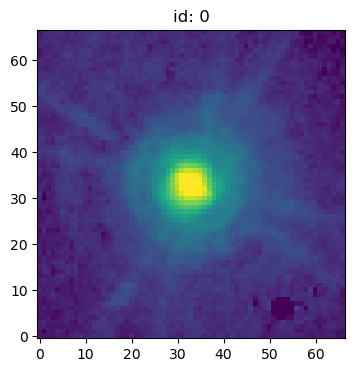

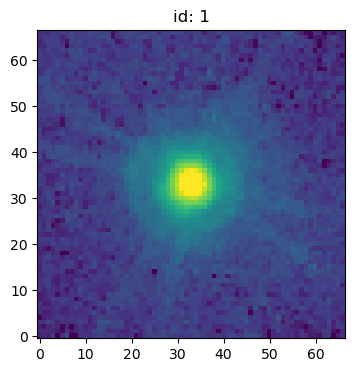

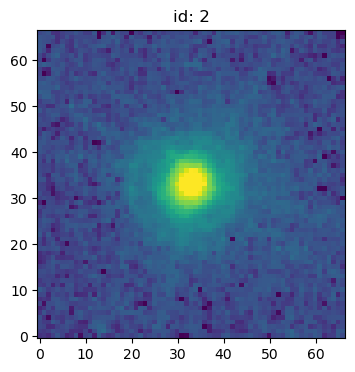

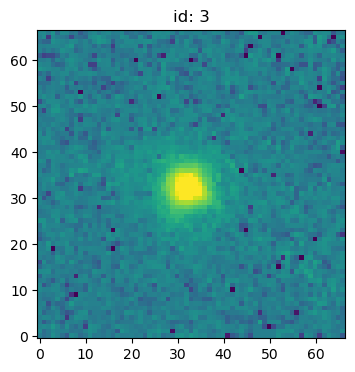

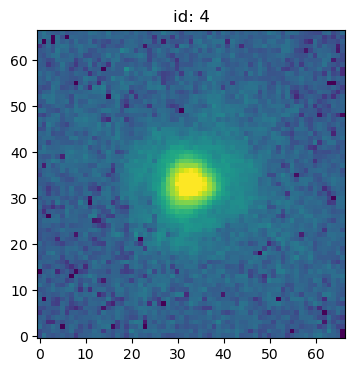

In [7]:
idx_incld = np.asarray([18, 71, 74, 77, 79])

mask = [False for i in range(len(peaks_tbl['x_peak']))]
for ii in range(len(idx_incld)):
    mask[int(idx_incld[ii])] = True
    
stars_tbl = Table()
stars_tbl['x'] = peaks_tbl['x_peak'][mask]  
stars_tbl['y'] = peaks_tbl['y_peak'][mask]

nddata = NDData(data=data_sci)
stars = extract_stars(nddata, stars_tbl, size=psf_size[int(id_fil)]) 

for ii in range(0,len(stars)):
    plt.figure(figsize=(4,4))
    plt.subplot()
    norm = simple_norm(stars[ii], 'log', percent=99.)
    plt.imshow(stars[ii], norm=norm, origin='lower', cmap='viridis')
    plt.title('id: %d' % ii)

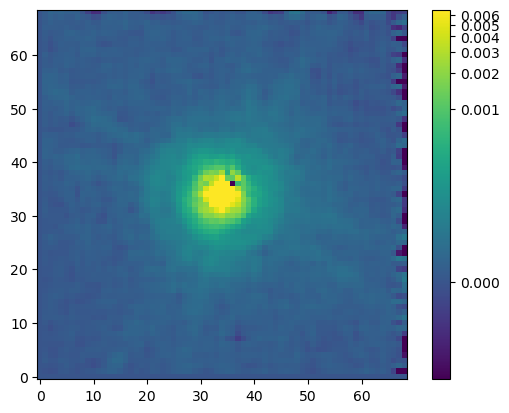

In [8]:
epsf_builder = EPSFBuilder(oversampling=1, maxiters=3, progress_bar=False)  
epsf, fitted_stars = epsf_builder(stars) 

norm = simple_norm(epsf.data, 'log', percent=99.)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
plt.colorbar()

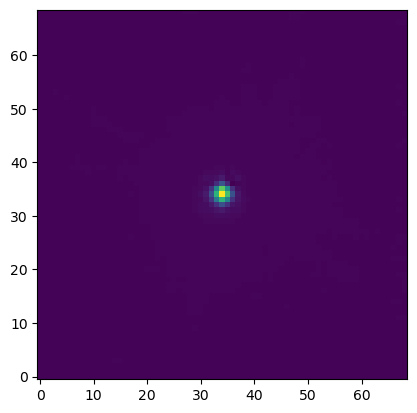

In [10]:
name_out = 'PSF_%s.fits' % fil_names[int(id_fil)]
fits.writeto(name_out, epsf.data, overwrite=True)

hdu = fits.open(name_out)
plt.imshow(hdu[0].data, origin='lower')
hdu.close()

### (2) PSF of HST/F475W

In [11]:
id_fil = 1
print (filters[int(id_fil)])

hdu = fits.open(dir_images+sci_img[filters[int(id_fil)]])
data_sci = hdu[0].data
hdu.close()

hdu = fits.open(dir_images+wht_img[filters[int(id_fil)]])
data_err = 1.0/np.sqrt(hdu[0].data)
hdu.close()

peaks_tbl = find_peaks(data_sci, threshold=200.0, error=data_err) 
peaks_tbl['peak_value'].info.format = '%.8g'  # for consistent table output 
print(peaks_tbl)

print ('Number of stars: %d' % len(peaks_tbl['x_peak']))

hst_acs_f475w
x_peak y_peak peak_value
------ ------ ----------
  7530   3690  811.49426
  6721   5086   1464.446
  3590   5273   1345.269
  5448   5413  1345.5505
  5462   5415  1272.0328
  5437   5419   1363.916
  5433   5420  1346.6504
  5440   5420  1354.3473
  5437   5422  1367.5935
  5427   5423  1348.8658
   ...    ...        ...
  4683   6660   1226.394
  8129   6661  1433.3177
  6403   6741  1426.2645
  6411   6741  282.76514
  8850   6948  1131.1732
  7407   8879   297.8707
  4655   8918  451.01999
  5447   8976  766.93488
  7762   9119  1455.2599
  7759   9122  1521.0879
  7753   9125   1515.797
Length = 164 rows
Number of stars: 164


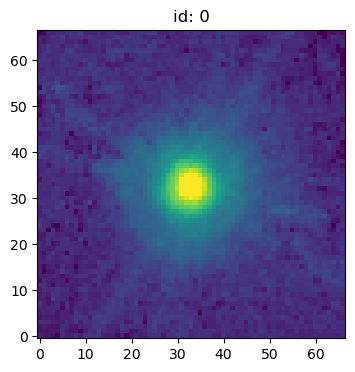

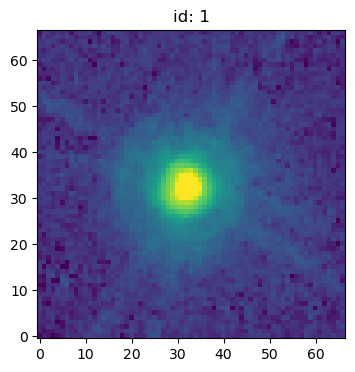

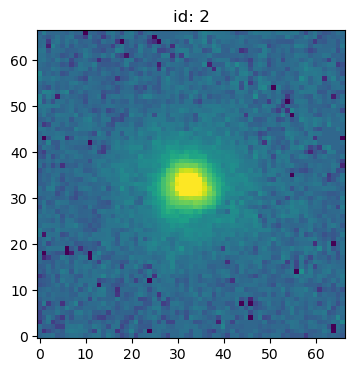

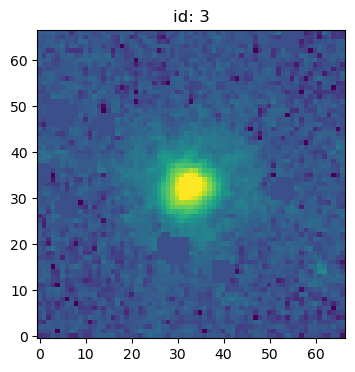

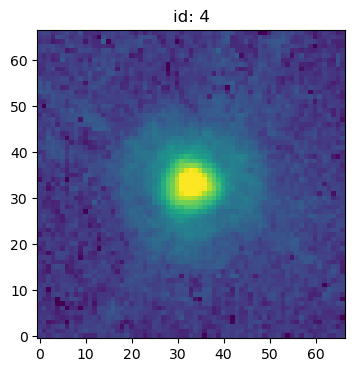

In [13]:
idx_incld = np.asarray([154, 157, 158, 159, 160])

mask = [False for i in range(len(peaks_tbl['x_peak']))]
for ii in range(len(idx_incld)):
    mask[int(idx_incld[ii])] = True
    
stars_tbl = Table()
stars_tbl['x'] = peaks_tbl['x_peak'][mask]  
stars_tbl['y'] = peaks_tbl['y_peak'][mask]

nddata = NDData(data=data_sci)
stars = extract_stars(nddata, stars_tbl, size=psf_size[int(id_fil)]) 

for ii in range(0,len(stars)):
    plt.figure(figsize=(4,4))
    plt.subplot()
    norm = simple_norm(stars[ii], 'log', percent=99.)
    plt.imshow(stars[ii], norm=norm, origin='lower', cmap='viridis')
    plt.title('id: %d' % ii)

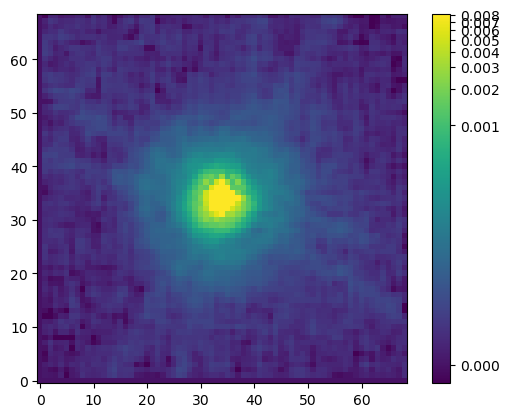

In [14]:
epsf_builder = EPSFBuilder(oversampling=1, maxiters=3, progress_bar=False)  
epsf, fitted_stars = epsf_builder(stars) 

norm = simple_norm(epsf.data, 'log', percent=99.)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
plt.colorbar()

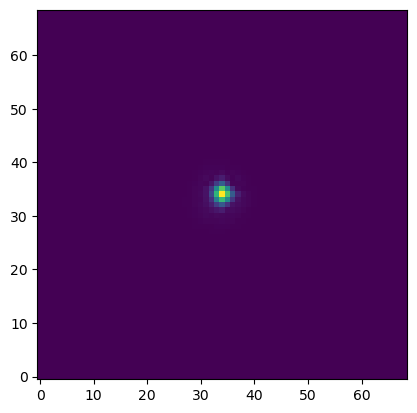

In [15]:
name_out = 'PSF_%s.fits' % fil_names[int(id_fil)]
fits.writeto(name_out, epsf.data, overwrite=True)

hdu = fits.open(name_out)
plt.imshow(hdu[0].data, origin='lower')
hdu.close()

### (3) HST/F555W

In [17]:
id_fil = 2
print (filters[int(id_fil)])

hdu = fits.open(dir_images+sci_img[filters[int(id_fil)]])
data_sci = hdu[0].data
hdu.close()

hdu = fits.open(dir_images+wht_img[filters[int(id_fil)]])
data_err = 1.0/np.sqrt(hdu[0].data)
hdu.close()

peaks_tbl = find_peaks(data_sci, threshold=100.0, error=data_err) 
peaks_tbl['peak_value'].info.format = '%.8g'  # for consistent table output 
print(peaks_tbl)

print ('Number of stars: %d' % len(peaks_tbl['x_peak']))

hst_acs_f555w
x_peak y_peak peak_value
------ ------ ----------
  7533   3692  457.29404
  7535   3692  768.26282
  7534   3694  395.00629
  6721   5086  1012.8448
  6722   5088   785.8764
  5441   5413  325.47733
  5442   5413  325.47733
  5434   5419    1092.11
  5439   5419   304.7449
  5429   5420  277.16962
   ...    ...        ...
  4449   8482  100.58501
  7869   8869  103.46478
  7408   8880  471.15662
  5447   8980  675.13159
  7758   9121   976.2608
  7759   9121   976.2608
  7762   9121  469.67902
  7761   9125  228.78484
  7757   9126   470.8887
  5862   9211   231.3632
  7795   9410  636.81885
Length = 103 rows
Number of stars: 103


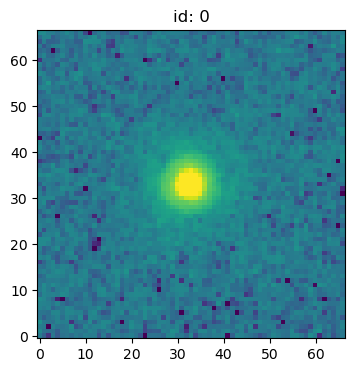

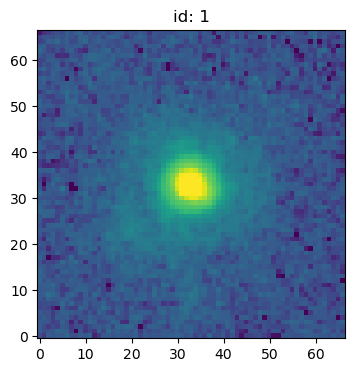

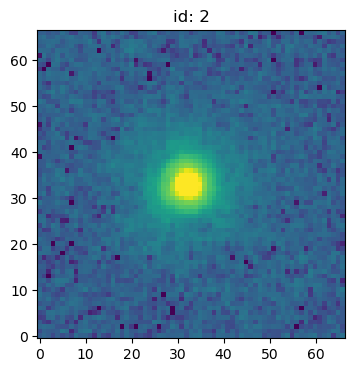

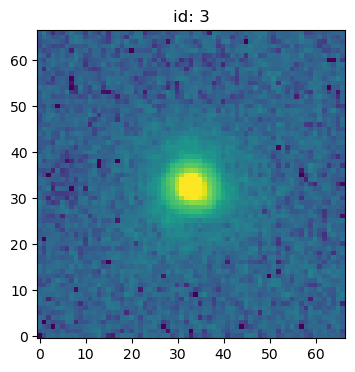

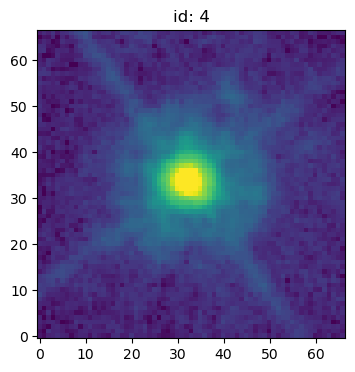

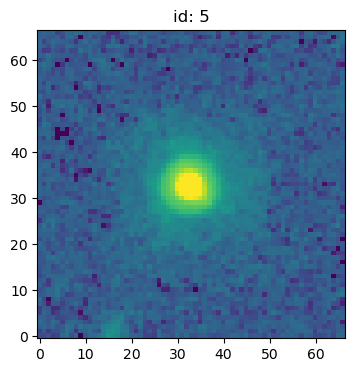

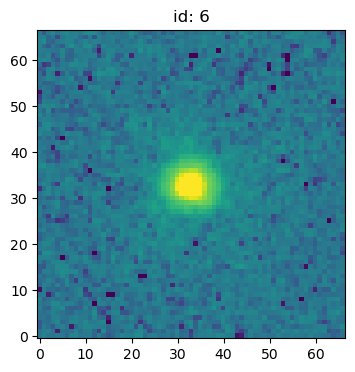

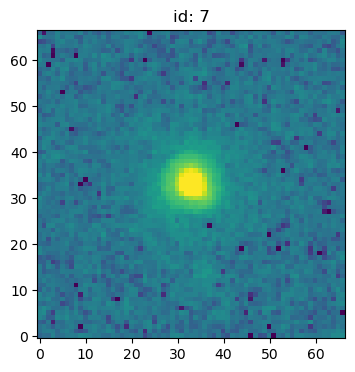

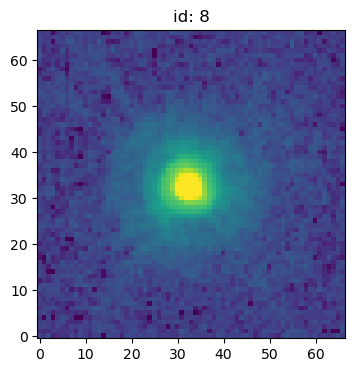

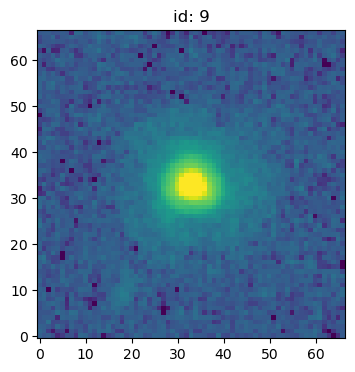

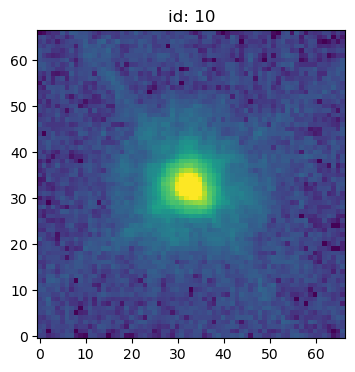

In [19]:
idx_incld = np.asarray([32, 33, 79, 87, 90, 91, 92, 93, 94, 101, 102])

mask = [False for i in range(len(peaks_tbl['x_peak']))]
for ii in range(len(idx_incld)):
    mask[int(idx_incld[ii])] = True
    
stars_tbl = Table()
stars_tbl['x'] = peaks_tbl['x_peak'][mask]  
stars_tbl['y'] = peaks_tbl['y_peak'][mask]

nddata = NDData(data=data_sci)
stars = extract_stars(nddata, stars_tbl, size=psf_size[int(id_fil)]) 

for ii in range(0,len(stars)):
    plt.figure(figsize=(4,4))
    plt.subplot()
    norm = simple_norm(stars[ii], 'log', percent=99.)
    plt.imshow(stars[ii], norm=norm, origin='lower', cmap='viridis')
    plt.title('id: %d' % ii)

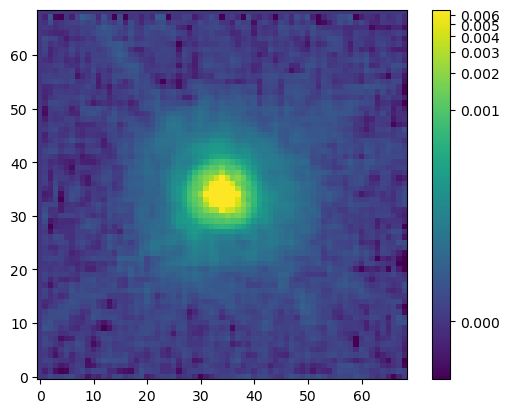

In [20]:
epsf_builder = EPSFBuilder(oversampling=1, maxiters=3, progress_bar=False)  
epsf, fitted_stars = epsf_builder(stars) 

norm = simple_norm(epsf.data, 'log', percent=99.)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
plt.colorbar()

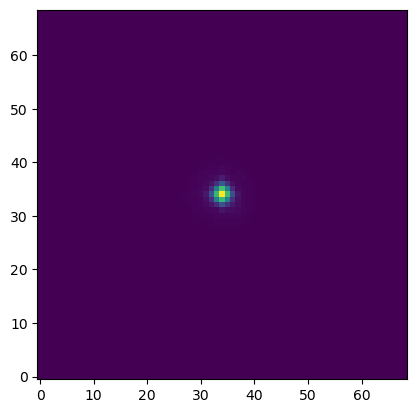

In [21]:
name_out = 'PSF_%s.fits' % fil_names[int(id_fil)]
fits.writeto(name_out, epsf.data, overwrite=True)

hdu = fits.open(name_out)
plt.imshow(hdu[0].data, origin='lower')
hdu.close()

### (4) HST/F606W

In [26]:
id_fil = 3
print (filters[int(id_fil)])

hdu = fits.open(dir_images+sci_img[filters[int(id_fil)]])
data_sci = hdu[0].data
hdu.close()

hdu = fits.open(dir_images+wht_img[filters[int(id_fil)]])
data_err = 1.0/np.sqrt(hdu[0].data)
hdu.close()

peaks_tbl = find_peaks(data_sci, threshold=300.0, error=data_err) 
peaks_tbl['peak_value'].info.format = '%.8g'  # for consistent table output 
print(peaks_tbl)

print ('Number of stars: %d' % len(peaks_tbl['x_peak']))

hst_acs_f606w
x_peak y_peak peak_value
------ ------ ----------
  7532   3690  1017.0247
  7529   3692  1011.0529
  6728   5084  973.33514
  6720   5086  1115.2432
  3592   5272  944.66913
  3595   5272  941.86761
  3588   5273  952.85944
  3585   5275  928.58447
  6695   5402  1077.1124
  5444   5418  751.99127
   ...    ...        ...
  7407   8880  801.79895
  4655   8918  966.11139
  5446   8977  1012.9222
  7769   9119  1252.8353
  7766   9120  1236.0856
  7756   9121  1226.9897
  7761   9121  1243.5922
  7755   9123  1270.5006
  7752   9127  1117.9004
  7755   9127  1112.7633
  5862   9211  319.87402
Length = 277 rows
Number of stars: 277


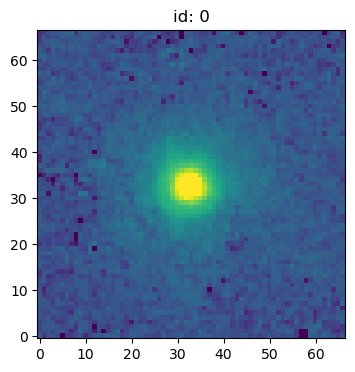

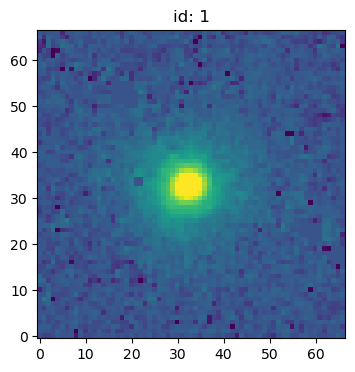

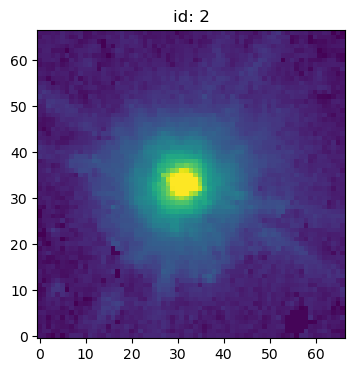

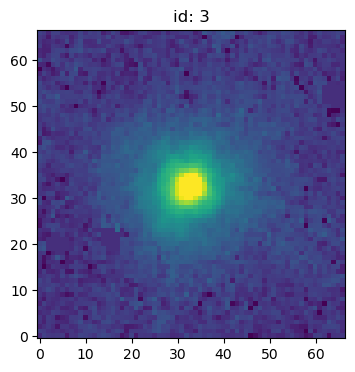

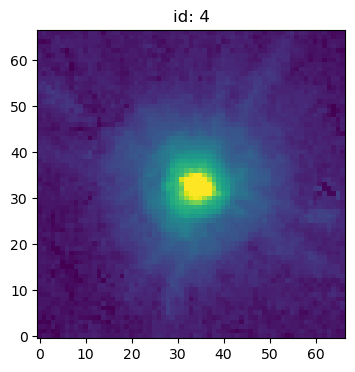

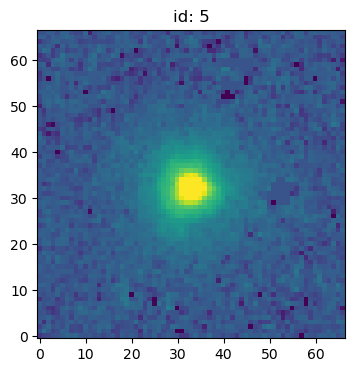

In [28]:
idx_incld = np.asarray([137, 245, 265, 266, 268, 276])

mask = [False for i in range(len(peaks_tbl['x_peak']))]
for ii in range(len(idx_incld)):
    mask[int(idx_incld[ii])] = True
    
stars_tbl = Table()
stars_tbl['x'] = peaks_tbl['x_peak'][mask]  
stars_tbl['y'] = peaks_tbl['y_peak'][mask]

nddata = NDData(data=data_sci)
stars = extract_stars(nddata, stars_tbl, size=psf_size[int(id_fil)]) 

for ii in range(0,len(stars)):
    plt.figure(figsize=(4,4))
    plt.subplot()
    norm = simple_norm(stars[ii], 'log', percent=99.)
    plt.imshow(stars[ii], norm=norm, origin='lower', cmap='viridis')
    plt.title('id: %d' % ii)

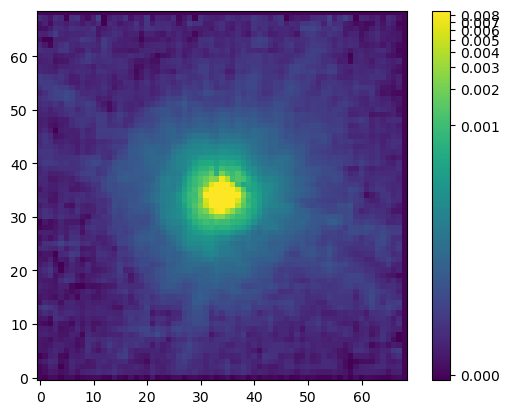

In [29]:
epsf_builder = EPSFBuilder(oversampling=1, maxiters=3, progress_bar=False)  
epsf, fitted_stars = epsf_builder(stars) 

norm = simple_norm(epsf.data, 'log', percent=99.)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
plt.colorbar()

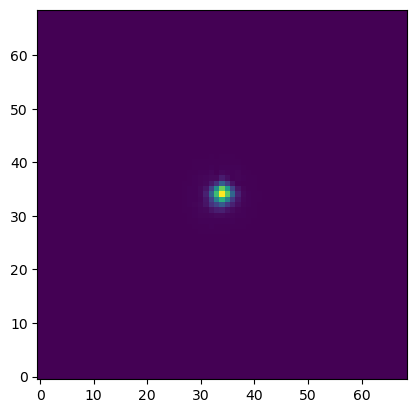

In [30]:
name_out = 'PSF_%s.fits' % fil_names[int(id_fil)]
fits.writeto(name_out, epsf.data, overwrite=True)

hdu = fits.open(name_out)
plt.imshow(hdu[0].data, origin='lower')
hdu.close()

### (5) HST/F625W

In [31]:
id_fil = 4
print (filters[int(id_fil)])

hdu = fits.open(dir_images+sci_img[filters[int(id_fil)]])
data_sci = hdu[0].data
hdu.close()

hdu = fits.open(dir_images+wht_img[filters[int(id_fil)]])
data_err = 1.0/np.sqrt(hdu[0].data)
hdu.close()

peaks_tbl = find_peaks(data_sci, threshold=300.0, error=data_err) 
peaks_tbl['peak_value'].info.format = '%.8g'  # for consistent table output 
print(peaks_tbl)

print ('Number of stars: %d' % len(peaks_tbl['x_peak']))

hst_acs_f625w
x_peak y_peak peak_value
------ ------ ----------
  7531   3691  1601.7903
  8669   4572    670.797
  8671   4574  1851.0234
  8673   4575  1870.4851
  8663   4576  1886.4207
  8666   4576  1880.5283
  8659   4577  1894.9664
  8638   4578  315.47281
  8655   4578  1923.2402
  8638   4579  315.47281
   ...    ...        ...
  4824   6827  333.88773
  8850   6948  1777.4941
  5976   8400  424.28638
  7407   8880  1038.5392
  4655   8918  1599.2607
  5447   8977  1776.9807
  7763   9120       2180
  7760   9121  2049.8892
  7753   9124  1915.3965
  7751   9127  1852.8538
  5862   9211  421.30206
Length = 373 rows
Number of stars: 373


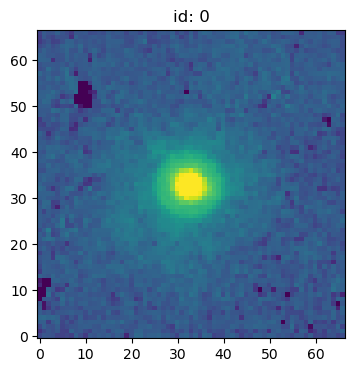

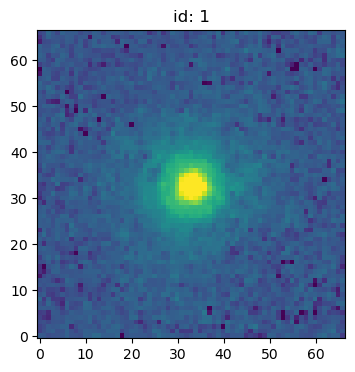

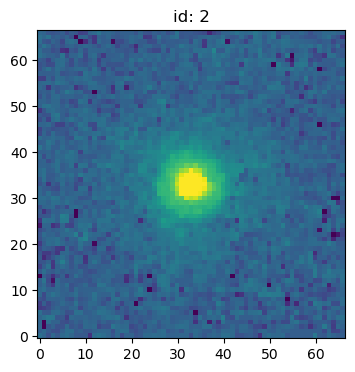

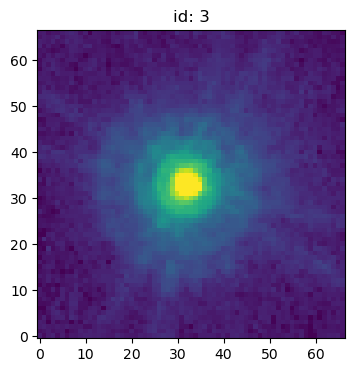

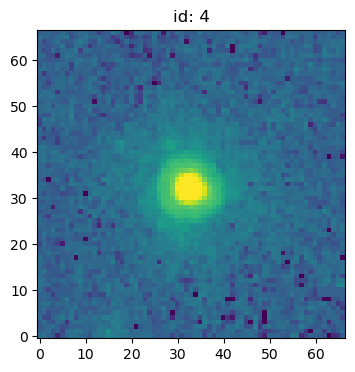

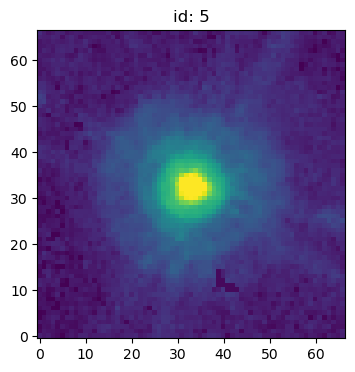

In [33]:
idx_incld = np.asarray([199, 343, 362, 363, 364, 367])

mask = [False for i in range(len(peaks_tbl['x_peak']))]
for ii in range(len(idx_incld)):
    mask[int(idx_incld[ii])] = True
    
stars_tbl = Table()
stars_tbl['x'] = peaks_tbl['x_peak'][mask]  
stars_tbl['y'] = peaks_tbl['y_peak'][mask]

nddata = NDData(data=data_sci)
stars = extract_stars(nddata, stars_tbl, size=psf_size[int(id_fil)]) 

for ii in range(0,len(stars)):
    plt.figure(figsize=(4,4))
    plt.subplot()
    norm = simple_norm(stars[ii], 'log', percent=99.)
    plt.imshow(stars[ii], norm=norm, origin='lower', cmap='viridis')
    plt.title('id: %d' % ii)

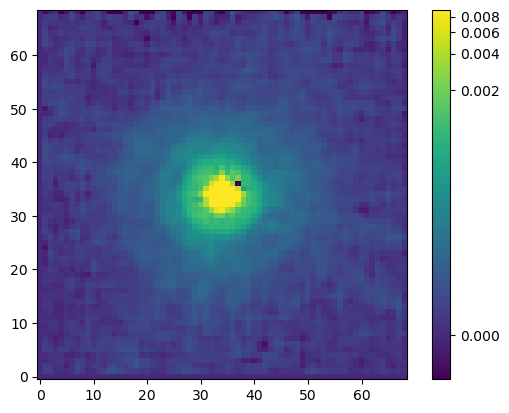

In [34]:
epsf_builder = EPSFBuilder(oversampling=1, maxiters=3, progress_bar=False)  
epsf, fitted_stars = epsf_builder(stars) 

norm = simple_norm(epsf.data, 'log', percent=99.)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
plt.colorbar()

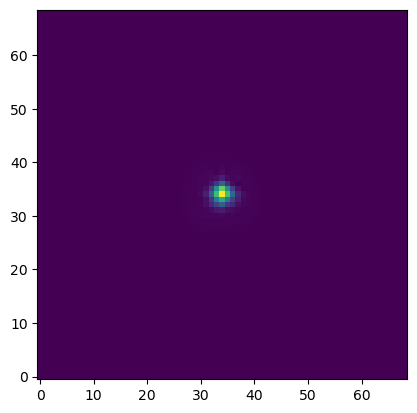

In [35]:
name_out = 'PSF_%s.fits' % fil_names[int(id_fil)]
fits.writeto(name_out, epsf.data, overwrite=True)

hdu = fits.open(name_out)
plt.imshow(hdu[0].data, origin='lower')
hdu.close()

### (6) HST/F775W

In [39]:
id_fil = 5
print (filters[int(id_fil)])

hdu = fits.open(dir_images+sci_img[filters[int(id_fil)]])
data_sci = hdu[0].data
hdu.close()

hdu = fits.open(dir_images+wht_img[filters[int(id_fil)]])
data_err = 1.0/np.sqrt(hdu[0].data)
hdu.close()

peaks_tbl = find_peaks(data_sci, threshold=400.0, error=data_err) 
peaks_tbl['peak_value'].info.format = '%.8g'  # for consistent table output 
print(peaks_tbl)

print ('Number of stars: %d' % len(peaks_tbl['x_peak']))

hst_acs_f775w
x_peak y_peak peak_value
------ ------ ----------
   676    101  642.90906
  1625   1879  1882.2142
  1628   1879  2261.8948
  1595   1880  425.97211
  1622   1880  2735.6963
  1619   1881  2632.0925
  1615   1882   2766.698
  1612   1883  2873.2463
  1601   1886  3296.9163
  1603   1886  3282.7253
   ...    ...        ...
  5976   8400  623.34021
  7869   8869  579.64319
  5445   8978  2091.5061
  7756   9121  2257.7673
  7759   9122  2312.0002
  7754   9124  2312.2454
  7756   9124     2317.2
  7751   9127  2287.8735
  7749   9129  2255.4944
  7746   9131  2187.5725
  5862   9211  590.31891
Length = 715 rows
Number of stars: 715


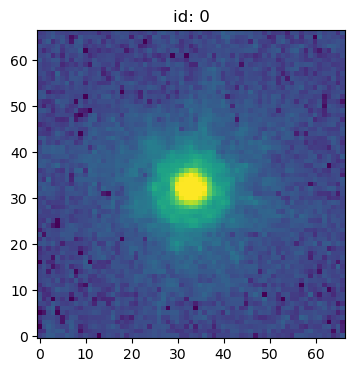

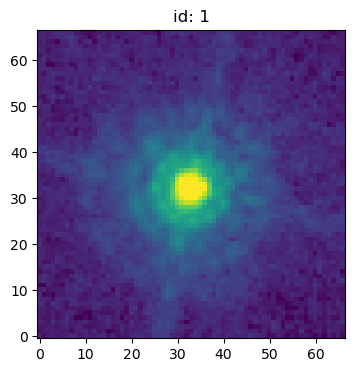

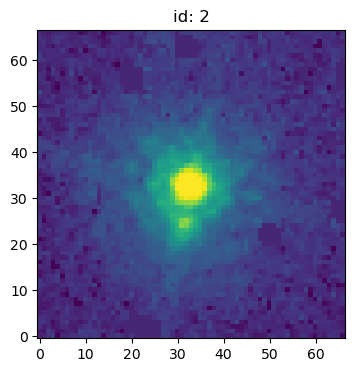

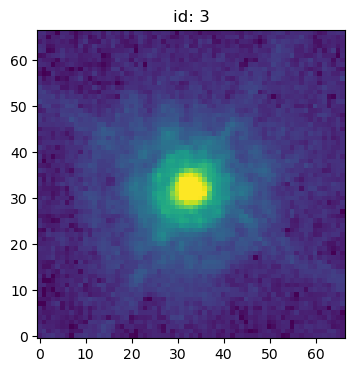

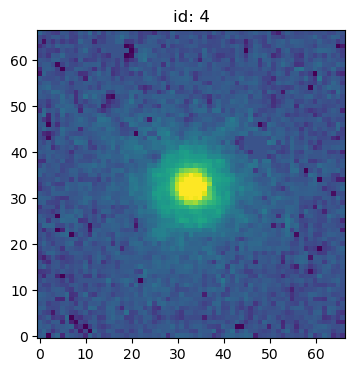

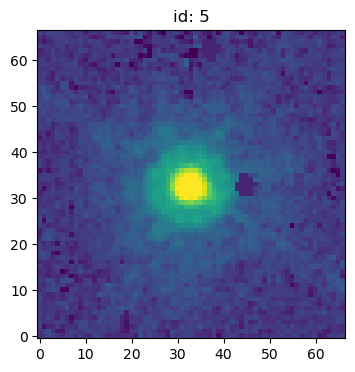

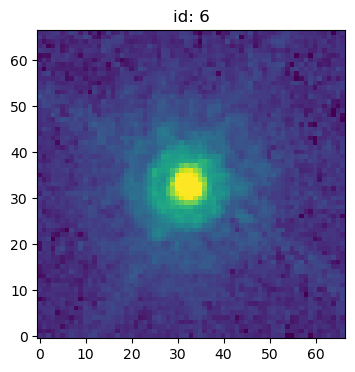

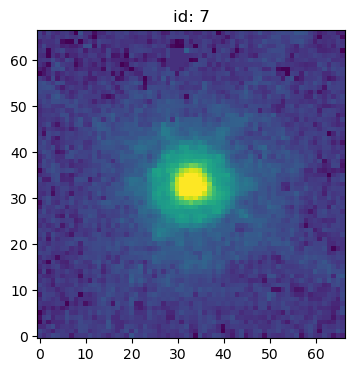

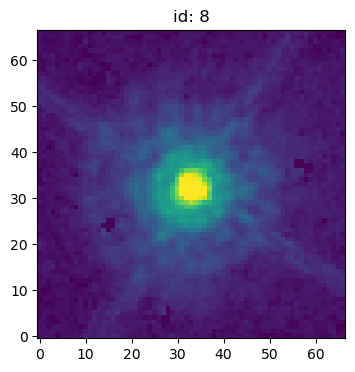

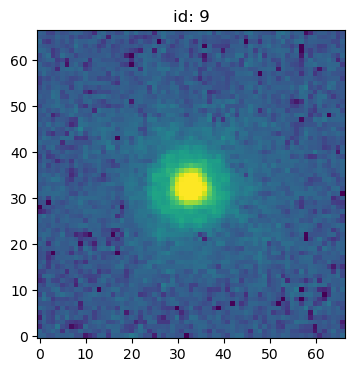

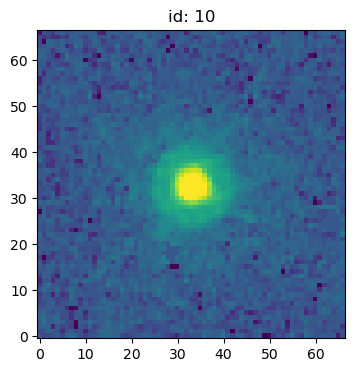

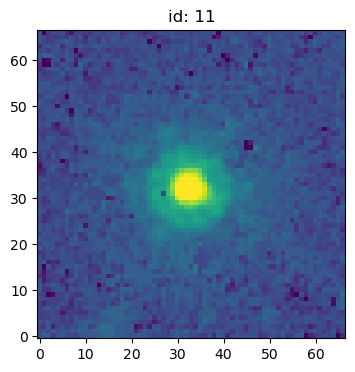

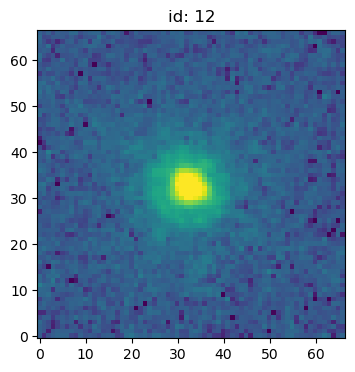

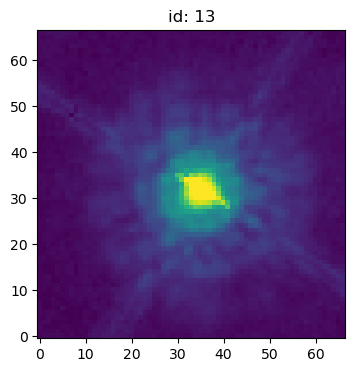

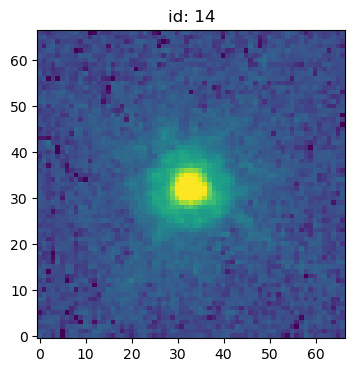

In [42]:
idx_incld = np.asarray([0, 18, 48, 49, 101, 395, 666, 
                        700, 701, 702, 703, 704, 705, 706, 714])

mask = [False for i in range(len(peaks_tbl['x_peak']))]
for ii in range(len(idx_incld)):
    mask[int(idx_incld[ii])] = True
    
stars_tbl = Table()
stars_tbl['x'] = peaks_tbl['x_peak'][mask]  
stars_tbl['y'] = peaks_tbl['y_peak'][mask]

nddata = NDData(data=data_sci)
stars = extract_stars(nddata, stars_tbl, size=psf_size[int(id_fil)]) 

for ii in range(0,len(stars)):
    plt.figure(figsize=(4,4))
    plt.subplot()
    norm = simple_norm(stars[ii], 'log', percent=99.)
    plt.imshow(stars[ii], norm=norm, origin='lower', cmap='viridis')
    plt.title('id: %d' % ii)

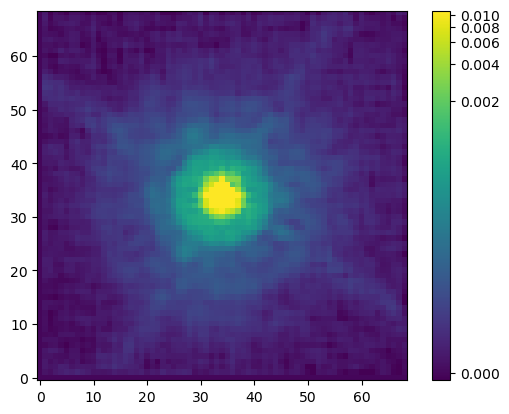

In [43]:
epsf_builder = EPSFBuilder(oversampling=1, maxiters=3, progress_bar=False)  
epsf, fitted_stars = epsf_builder(stars) 

norm = simple_norm(epsf.data, 'log', percent=99.)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
plt.colorbar()

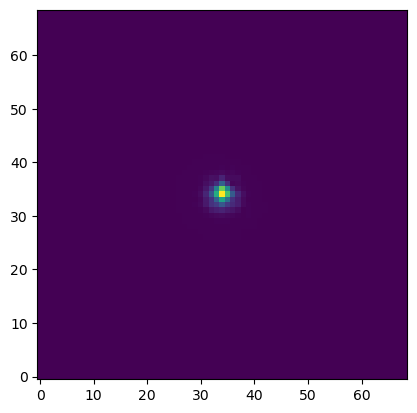

In [44]:
name_out = 'PSF_%s.fits' % fil_names[int(id_fil)]
fits.writeto(name_out, epsf.data, overwrite=True)

hdu = fits.open(name_out)
plt.imshow(hdu[0].data, origin='lower')
hdu.close()

### (7) HST/F814W

In [48]:
id_fil = 6
print (filters[int(id_fil)])

hdu = fits.open(dir_images+sci_img[filters[int(id_fil)]])
data_sci = hdu[0].data
hdu.close()

hdu = fits.open(dir_images+wht_img[filters[int(id_fil)]])
data_err = 1.0/np.sqrt(hdu[0].data)
hdu.close()

peaks_tbl = find_peaks(data_sci, threshold=100.0, error=data_err) 
peaks_tbl['peak_value'].info.format = '%.8g'  # for consistent table output 
print(peaks_tbl)

print ('Number of stars: %d' % len(peaks_tbl['x_peak']))

hst_acs_f814w
x_peak y_peak peak_value
------ ------ ----------
  7542   3685  844.49731
  7535   3690   1601.632
  7533   3693  1568.8723
  7528   3695  1600.1683
  7525   3697  1582.5042
  7610   4403  214.60791
  5581   4530  160.83945
  6550   4943  277.75217
  5623   4954  135.72267
  5779   4990  312.26669
   ...    ...        ...
  8652   8986  1092.3966
  7754   9117  147.30927
  7760   9121  1417.0303
  7756   9122  1398.1971
  7756   9124  1410.0863
  7760   9124   1398.298
  7751   9125  112.97031
  5862   9211    716.146
  7794   9410  997.65155
  6089   9909  227.99275
  7316  10098  499.95447
Length = 179 rows
Number of stars: 179


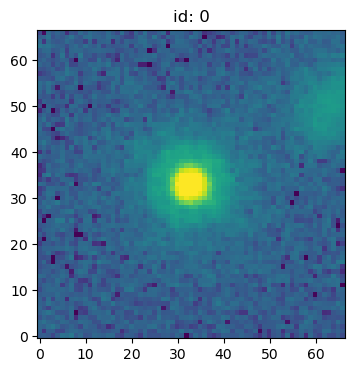

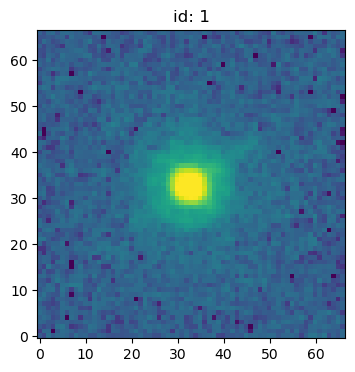

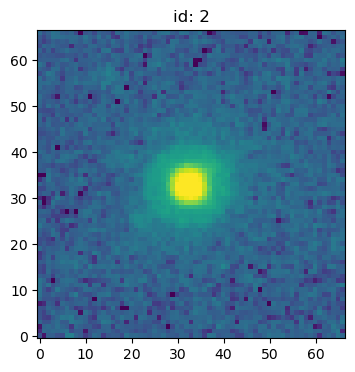

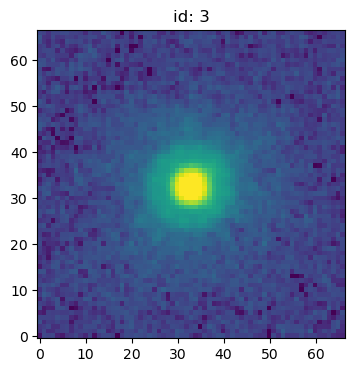

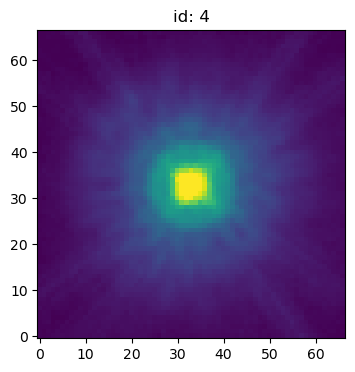

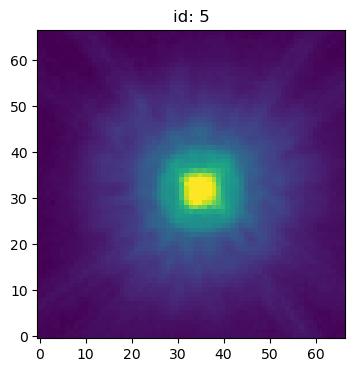

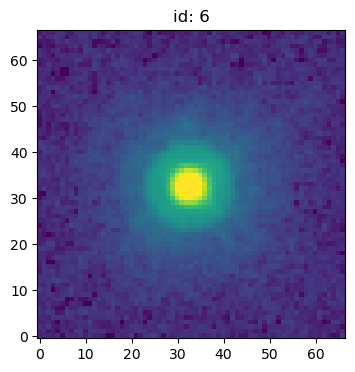

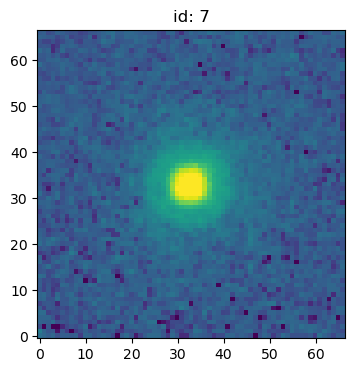

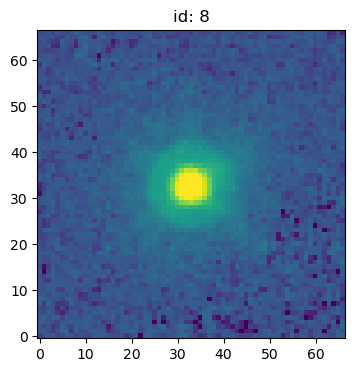

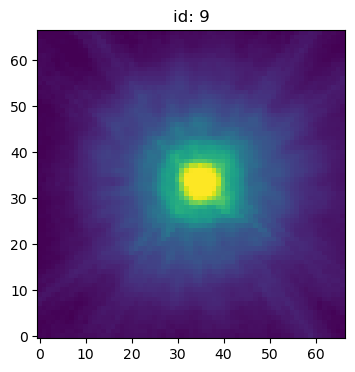

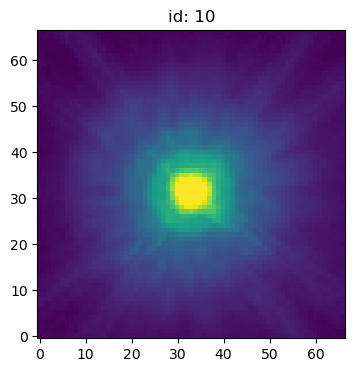

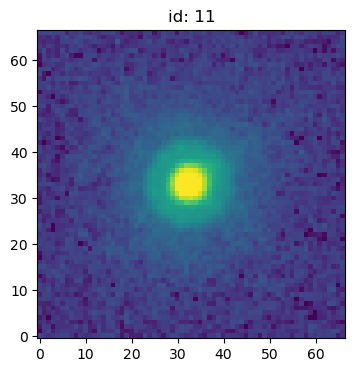

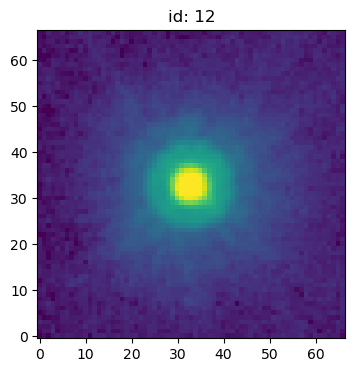

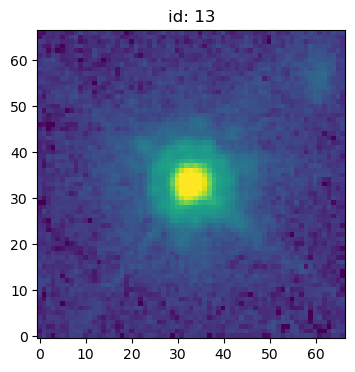

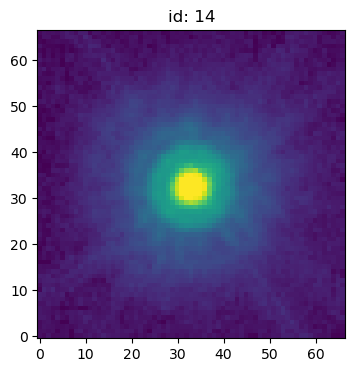

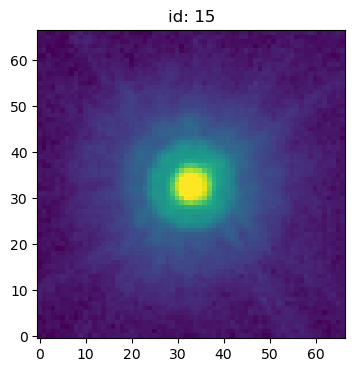

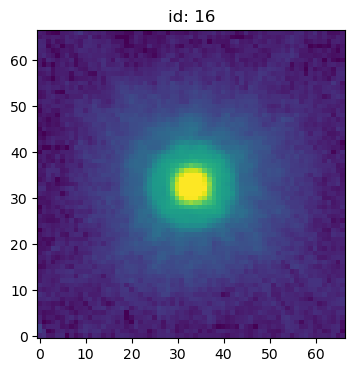

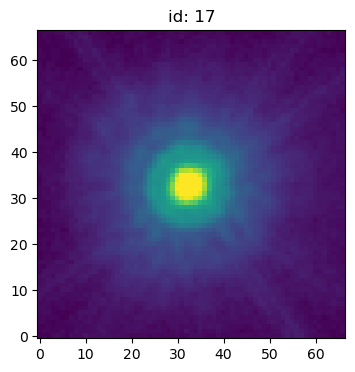

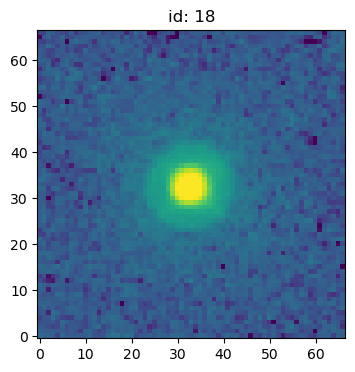

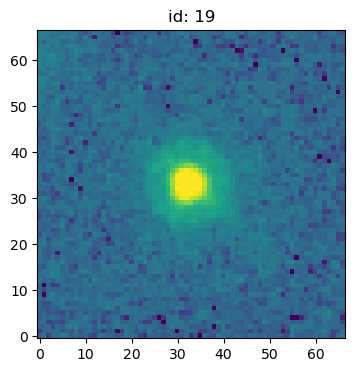

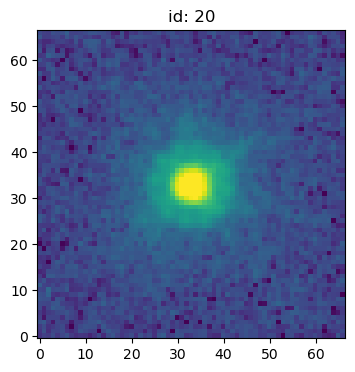

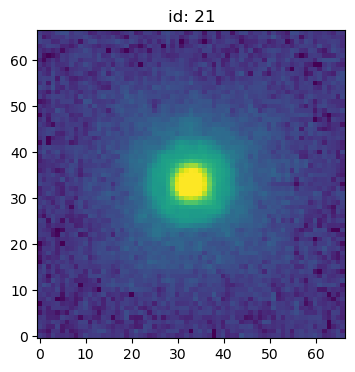

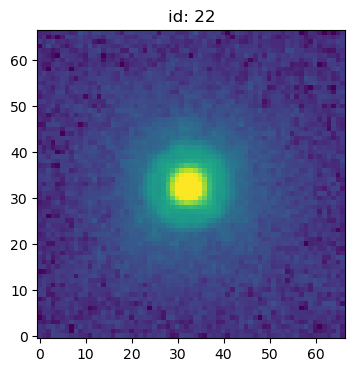

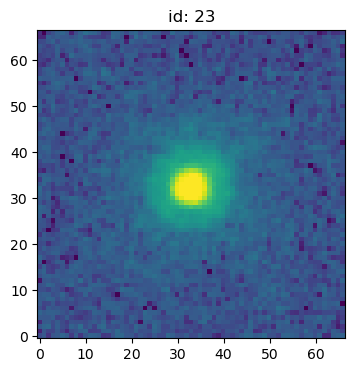

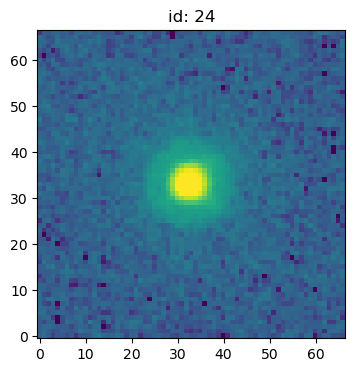

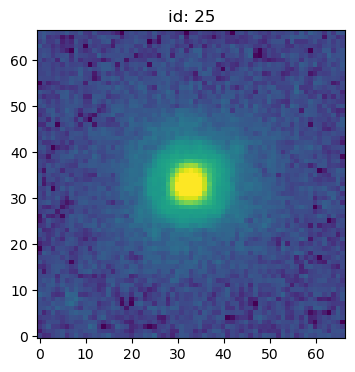

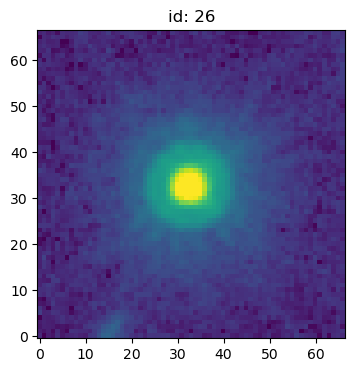

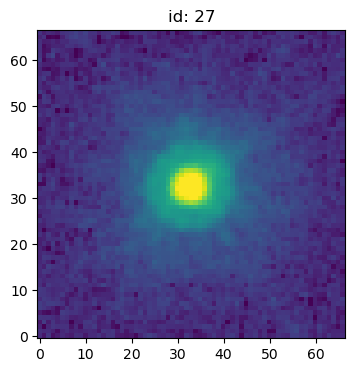

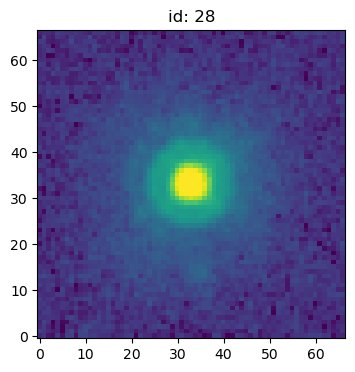

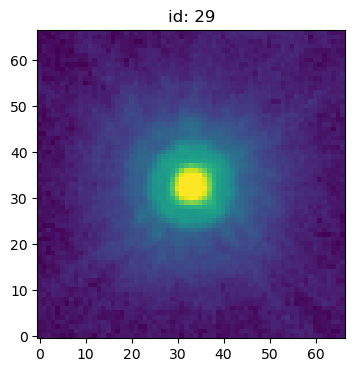

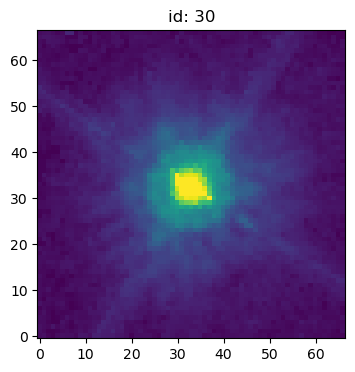

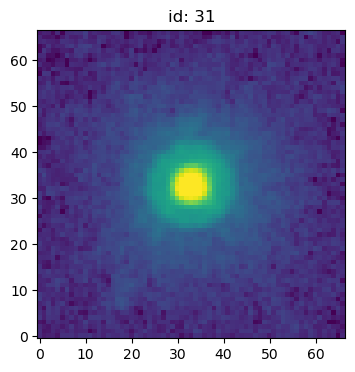

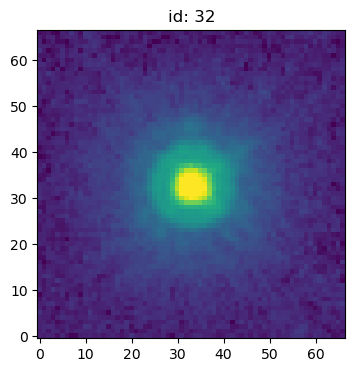

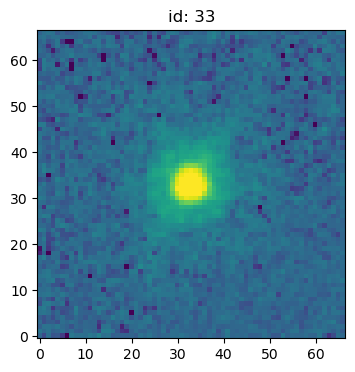

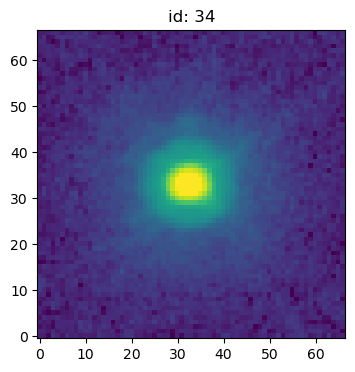

In [50]:
idx_incld = np.asarray([5, 6, 8, 9, 11, 12, 20, 39, 42, 44, 
                        45, 47, 48, 115, 116, 117, 124, 125, 
                        126, 127, 128, 130, 132, 136, 137, 138, 
                       139, 140, 141, 142, 145, 175, 176, 177, 178])

mask = [False for i in range(len(peaks_tbl['x_peak']))]
for ii in range(len(idx_incld)):
    mask[int(idx_incld[ii])] = True
    
stars_tbl = Table()
stars_tbl['x'] = peaks_tbl['x_peak'][mask]  
stars_tbl['y'] = peaks_tbl['y_peak'][mask]

nddata = NDData(data=data_sci)
stars = extract_stars(nddata, stars_tbl, size=psf_size[int(id_fil)]) 

for ii in range(0,len(stars)):
    plt.figure(figsize=(4,4))
    plt.subplot()
    norm = simple_norm(stars[ii], 'log', percent=99.)
    plt.imshow(stars[ii], norm=norm, origin='lower', cmap='viridis')
    plt.title('id: %d' % ii)

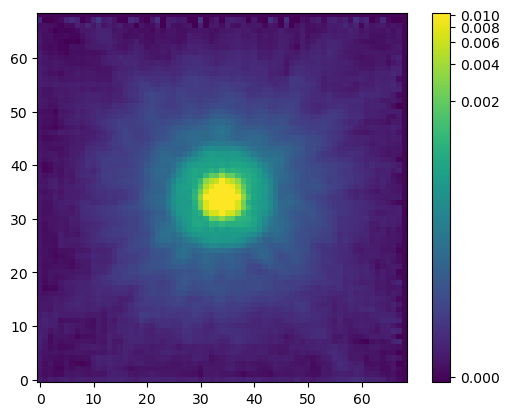

In [51]:
epsf_builder = EPSFBuilder(oversampling=1, maxiters=3, progress_bar=False)  
epsf, fitted_stars = epsf_builder(stars) 

norm = simple_norm(epsf.data, 'log', percent=99.)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
plt.colorbar()

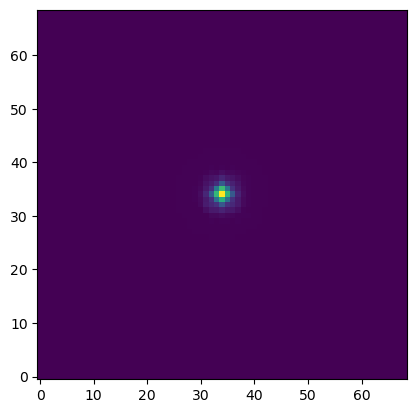

In [52]:
name_out = 'PSF_%s.fits' % fil_names[int(id_fil)]
fits.writeto(name_out, epsf.data, overwrite=True)

hdu = fits.open(name_out)
plt.imshow(hdu[0].data, origin='lower')
hdu.close()

### (8) HST/F850LP

In [53]:
id_fil = 7
print (filters[int(id_fil)])

hdu = fits.open(dir_images+sci_img[filters[int(id_fil)]])
data_sci = hdu[0].data
hdu.close()

hdu = fits.open(dir_images+wht_img[filters[int(id_fil)]])
data_err = 1.0/np.sqrt(hdu[0].data)
hdu.close()

peaks_tbl = find_peaks(data_sci, threshold=100.0, error=data_err) 
peaks_tbl['peak_value'].info.format = '%.8g'  # for consistent table output 
print(peaks_tbl)

print ('Number of stars: %d' % len(peaks_tbl['x_peak']))

hst_acs_f850lp
x_peak y_peak peak_value
------ ------ ----------
   676    101   1039.901
   955    504  200.14877
   461    987  364.77567
  1313   1576  307.70084
  1755   1642  474.24722
  1595   1873  142.70615
  1594   1879  361.68826
  1603   1880  328.08682
  1591   1882   302.1893
  1612   1883  257.84702
   ...    ...        ...
  7758   9113  153.41377
  7750   9117  115.32106
  7749   9121  110.08488
  7758   9121  5025.9019
  7760   9121  5018.0601
  7763   9121  4397.8726
  7756   9122  5056.2544
  7749   9125  115.19414
  7751   9129  105.11823
  5862   9210  602.39081
  6089   9910  204.95248
Length = 416 rows
Number of stars: 416


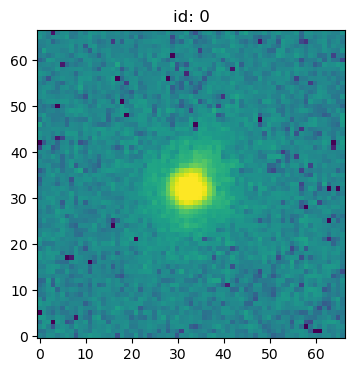

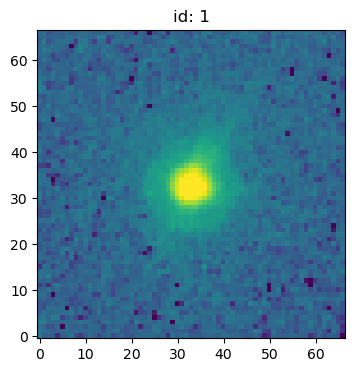

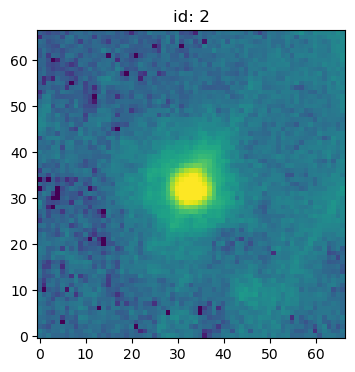

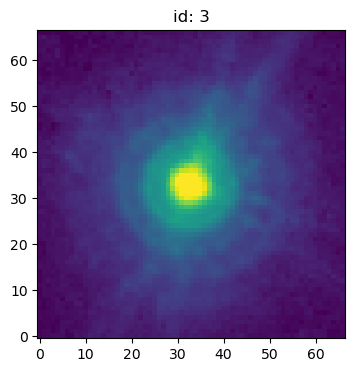

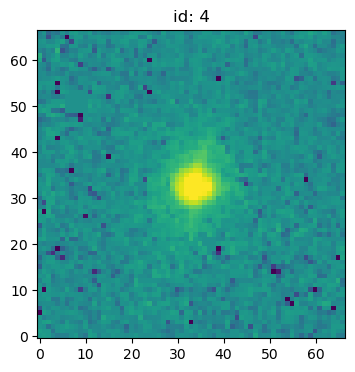

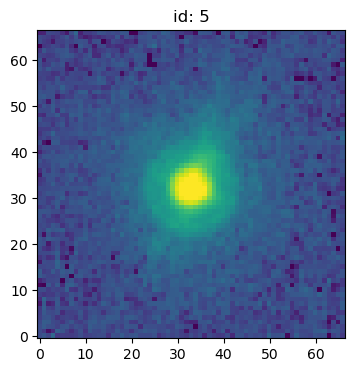

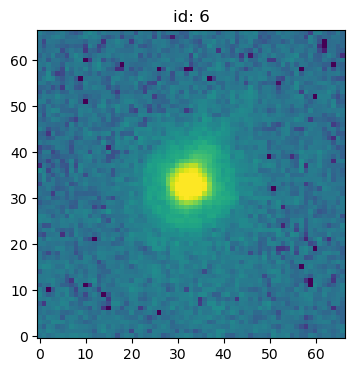

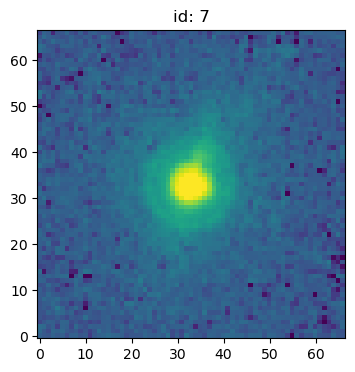

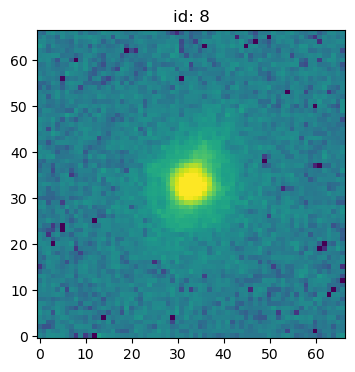

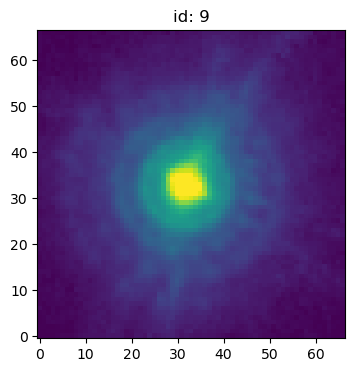

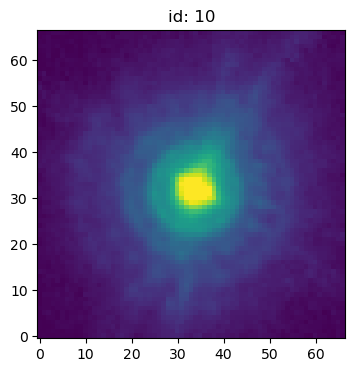

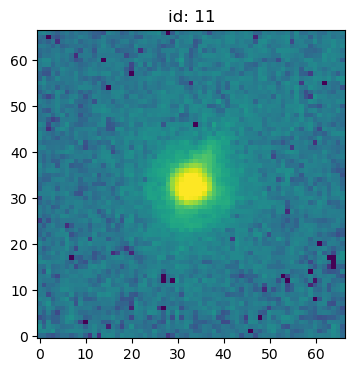

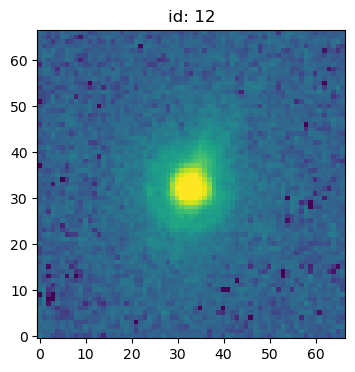

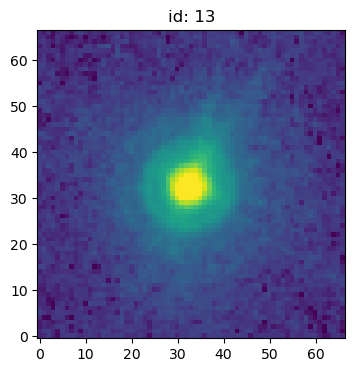

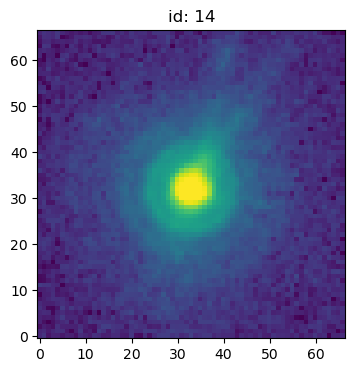

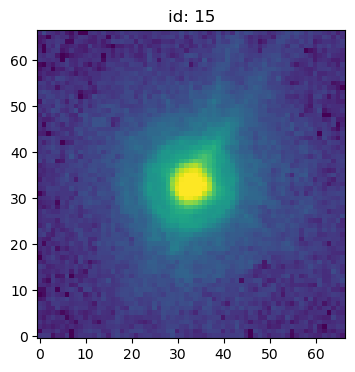

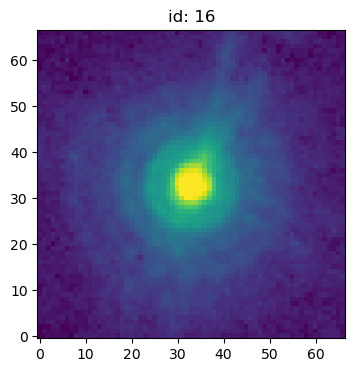

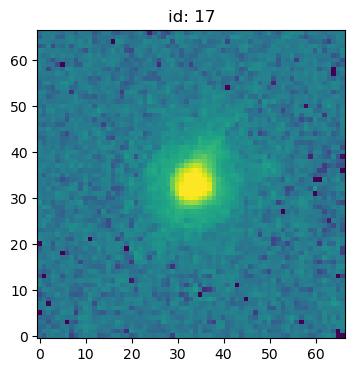

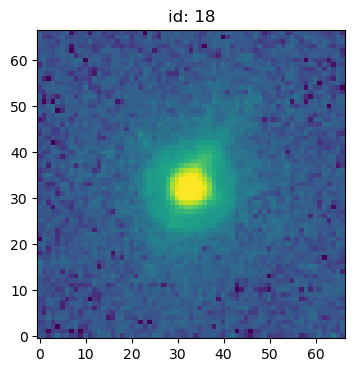

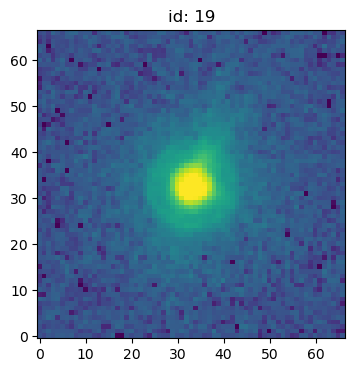

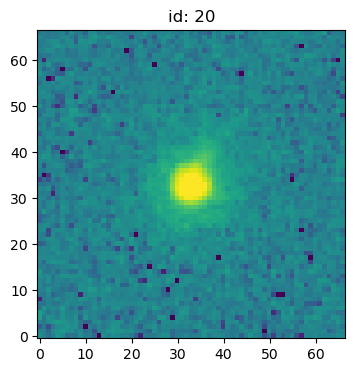

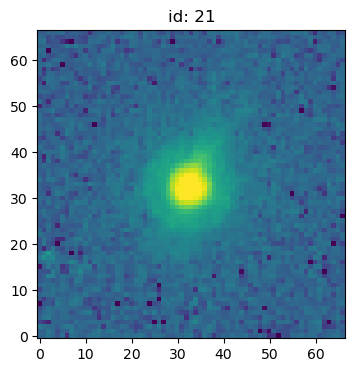

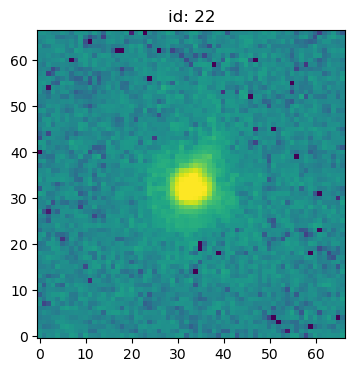

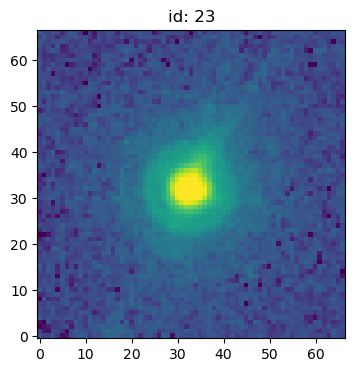

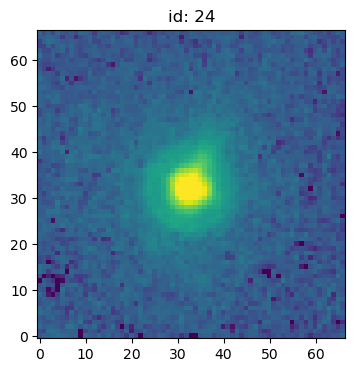

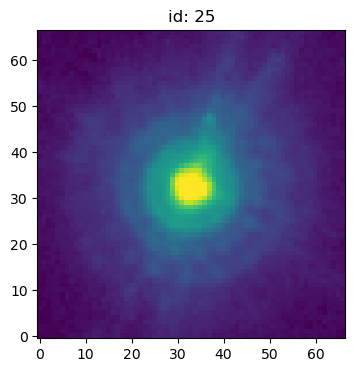

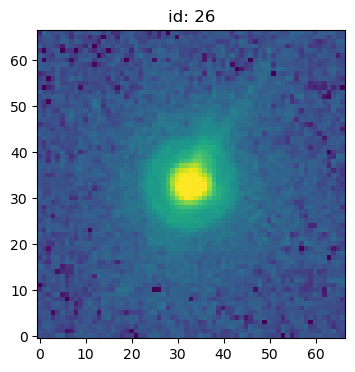

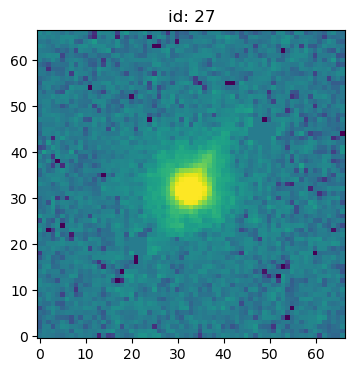

In [55]:
idx_incld = np.asarray([211, 212, 213, 215, 216, 241, 287, 288, 
                       291, 292, 293, 294, 295, 299, 376, 389, 
                        390, 391, 392, 394, 396, 397, 398, 399,
                        401, 404, 414, 415])

mask = [False for i in range(len(peaks_tbl['x_peak']))]
for ii in range(len(idx_incld)):
    mask[int(idx_incld[ii])] = True
    
stars_tbl = Table()
stars_tbl['x'] = peaks_tbl['x_peak'][mask]  
stars_tbl['y'] = peaks_tbl['y_peak'][mask]

nddata = NDData(data=data_sci)
stars = extract_stars(nddata, stars_tbl, size=psf_size[int(id_fil)]) 

for ii in range(0,len(stars)):
    plt.figure(figsize=(4,4))
    plt.subplot()
    norm = simple_norm(stars[ii], 'log', percent=99.)
    plt.imshow(stars[ii], norm=norm, origin='lower', cmap='viridis')
    plt.title('id: %d' % ii)

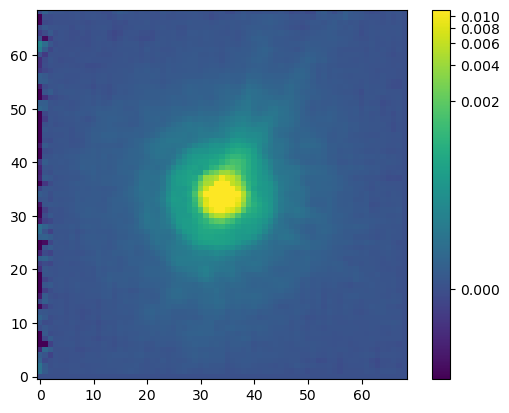

In [56]:
epsf_builder = EPSFBuilder(oversampling=1, maxiters=3, progress_bar=False)  
epsf, fitted_stars = epsf_builder(stars) 

norm = simple_norm(epsf.data, 'log', percent=99.)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
plt.colorbar()

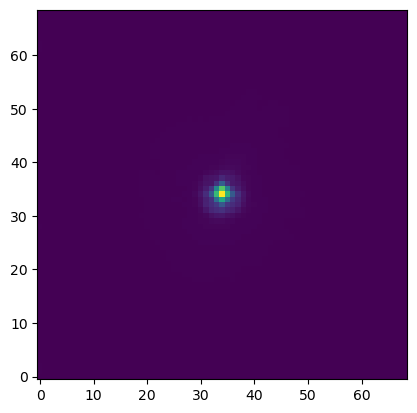

In [57]:
name_out = 'PSF_%s.fits' % fil_names[int(id_fil)]
fits.writeto(name_out, epsf.data, overwrite=True)

hdu = fits.open(name_out)
plt.imshow(hdu[0].data, origin='lower')
hdu.close()

### (9) JWST/F115W

In [6]:
id_fil = 8
print (filters[int(id_fil)])

hdu = fits.open(dir_images+sci_img[filters[int(id_fil)]])
data_sci = hdu[0].data
hdu.close()

hdu = fits.open(dir_images+wht_img[filters[int(id_fil)]])
data_err = 1.0/np.sqrt(hdu[0].data)
hdu.close()

peaks_tbl = find_peaks(data_sci, threshold=200.0, error=data_err) 
peaks_tbl['peak_value'].info.format = '%.8g'  # for consistent table output 
print(peaks_tbl)

print ('Number of stars: %d' % len(peaks_tbl['x_peak']))

jwst_nircam_f115w
x_peak y_peak peak_value
------ ------ ----------
 15545   2681  320.33038
 18751   3604  308.17017
 16660   5417  204.30246
 16663   5427  209.79573
 16664   5429  213.42313
 16668   5442  208.89969
 16669   5444  257.59793
 16670   5446  243.25212
 16671   5450  334.48917
 16673   5454  266.01682
   ...    ...        ...
 17961   9156  552.19098
 17967   9157  238.94504
 13138  10944   218.2963
 13171  10951  205.37274
 13134  10972  223.69974
 13134  10973  223.69974
 13170  10979  228.84291
 13160  10987  224.95351
 13138  10989  203.35625
 13127  10993  226.33835
 11979  16478  211.16092
Length = 1681 rows
Number of stars: 1681


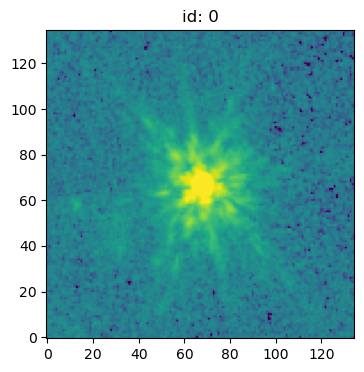

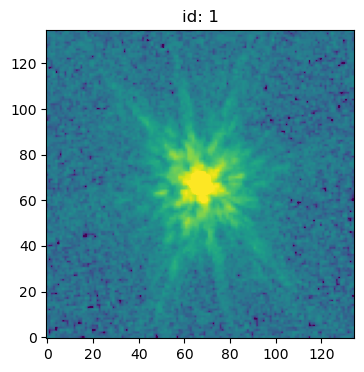

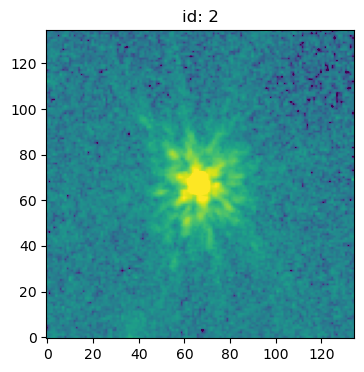

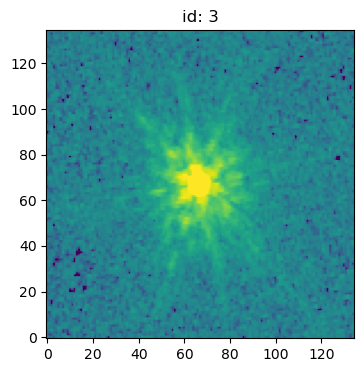

In [9]:
idx_incld = np.asarray([0, 1, 131, 1680])

mask = [False for i in range(len(peaks_tbl['x_peak']))]
for ii in range(len(idx_incld)):
    mask[int(idx_incld[ii])] = True
    
stars_tbl = Table()
stars_tbl['x'] = peaks_tbl['x_peak'][mask]  
stars_tbl['y'] = peaks_tbl['y_peak'][mask]

nddata = NDData(data=data_sci)
stars = extract_stars(nddata, stars_tbl, size=psf_size[int(id_fil)]) 

for ii in range(0,len(stars)):
    plt.figure(figsize=(4,4))
    plt.subplot()
    norm = simple_norm(stars[ii], 'log', percent=99.)
    plt.imshow(stars[ii], norm=norm, origin='lower', cmap='viridis')
    plt.title('id: %d' % ii)

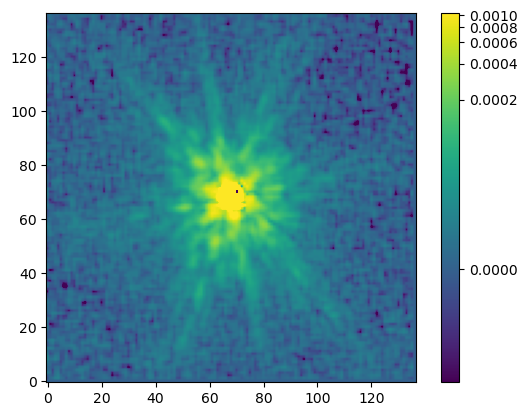

In [10]:
epsf_builder = EPSFBuilder(oversampling=1, maxiters=3, progress_bar=False)  
epsf, fitted_stars = epsf_builder(stars) 

norm = simple_norm(epsf.data, 'log', percent=99.)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
plt.colorbar()

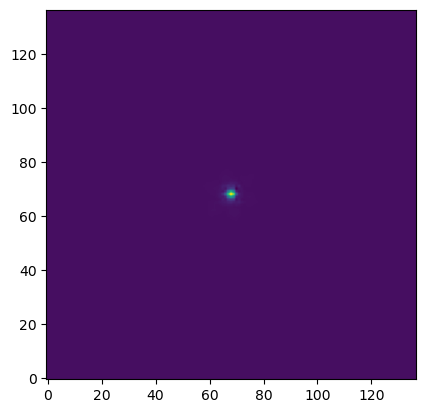

In [11]:
name_out = 'PSF_%s.fits' % fil_names[int(id_fil)]
fits.writeto(name_out, epsf.data, overwrite=True)

hdu = fits.open(name_out)
plt.imshow(hdu[0].data, origin='lower')
hdu.close()

### (10) JWST/F150W

In [8]:
id_fil = 9
print (filters[int(id_fil)])

hdu = fits.open(dir_images+sci_img[filters[int(id_fil)]])
data_sci = hdu[0].data
hdu.close()

hdu = fits.open(dir_images+wht_img[filters[int(id_fil)]])
data_err = 1.0/np.sqrt(hdu[0].data)
hdu.close()

peaks_tbl = find_peaks(data_sci, threshold=150.0, error=data_err) 
peaks_tbl['peak_value'].info.format = '%.8g'  # for consistent table output 
print(peaks_tbl)

print ('Number of stars: %d' % len(peaks_tbl['x_peak']))

jwst_nircam_f150w
x_peak y_peak peak_value
------ ------ ----------
 13013   1453  154.37469
 12574   2563  186.91008
 15872   5871  196.66896
 15049   7368  200.89888
 15052   7368  216.87276
 15052   7369  216.87276
 15044   7370  178.57034
 15058   7373  177.48853
 15059   7373  177.48853
 15059   7376  193.17101
   ...    ...        ...
 13131  10965  187.40645
 13131  10966  187.40645
 13172  10975   162.2309
 13161  10993  168.46838
 16372  11328  155.93893
 12818  13474  154.43408
 12819  13474  154.43408
 12818  13475  154.43408
 12819  13475  154.43408
 12816  13487  151.21095
 11978  16478  210.75044
Length = 552 rows
Number of stars: 552


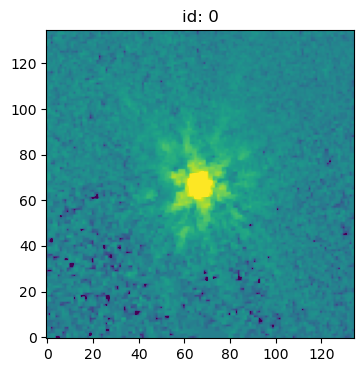

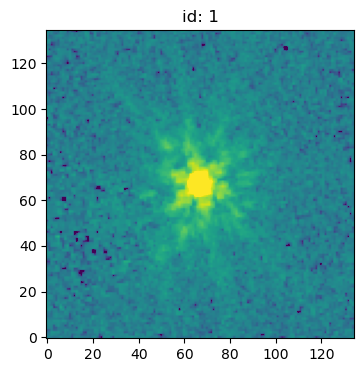

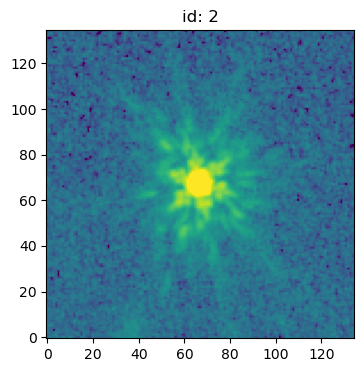

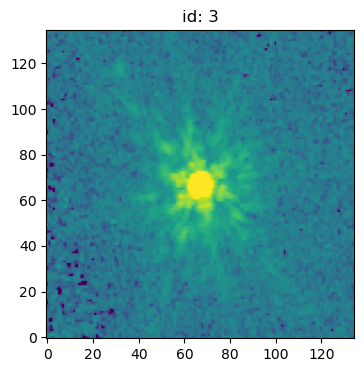

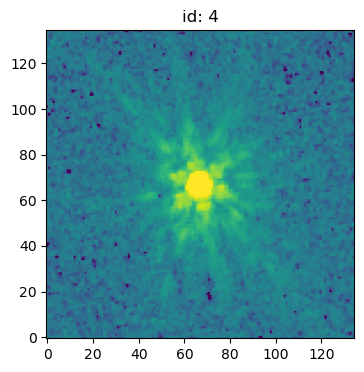

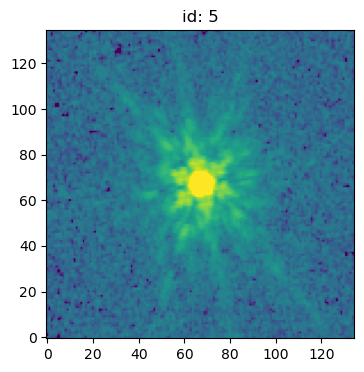

In [10]:
idx_incld = np.asarray([0, 1, 2, 530, 545, 551])

mask = [False for i in range(len(peaks_tbl['x_peak']))]
for ii in range(len(idx_incld)):
    mask[int(idx_incld[ii])] = True
    
stars_tbl = Table()
stars_tbl['x'] = peaks_tbl['x_peak'][mask]  
stars_tbl['y'] = peaks_tbl['y_peak'][mask]

nddata = NDData(data=data_sci)
stars = extract_stars(nddata, stars_tbl, size=psf_size[int(id_fil)]) 

for ii in range(0,len(stars)):
    plt.figure(figsize=(4,4))
    plt.subplot()
    norm = simple_norm(stars[ii], 'log', percent=99.)
    plt.imshow(stars[ii], norm=norm, origin='lower', cmap='viridis')
    plt.title('id: %d' % ii)

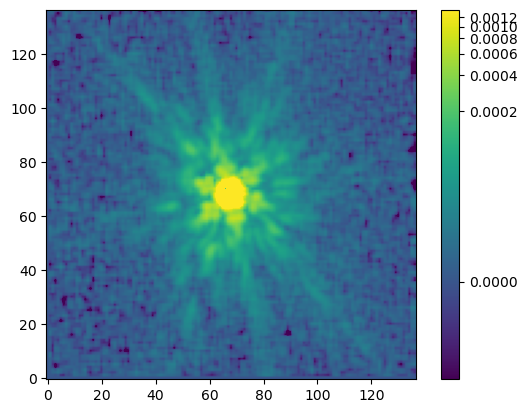

In [11]:
epsf_builder = EPSFBuilder(oversampling=1, maxiters=3, progress_bar=False)  
epsf, fitted_stars = epsf_builder(stars) 

norm = simple_norm(epsf.data, 'log', percent=99.)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
plt.colorbar()

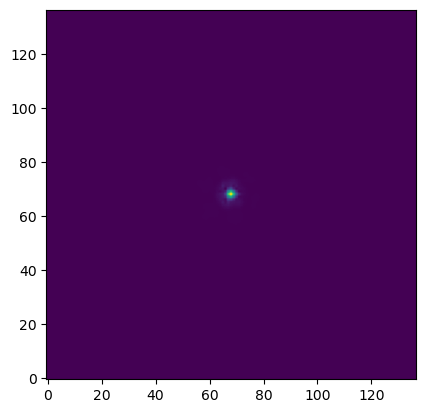

In [12]:
name_out = 'PSF_%s.fits' % fil_names[int(id_fil)]
fits.writeto(name_out, epsf.data, overwrite=True)

hdu = fits.open(name_out)
plt.imshow(hdu[0].data, origin='lower')
hdu.close()

### (11) JWST/F200W

In [15]:
id_fil = 10
print (filters[int(id_fil)])

hdu = fits.open(dir_images+sci_img[filters[int(id_fil)]])
data_sci = hdu[0].data
hdu.close()

hdu = fits.open(dir_images+wht_img[filters[int(id_fil)]])
data_err = 1.0/np.sqrt(hdu[0].data)
hdu.close()

peaks_tbl = find_peaks(data_sci, threshold=100.0, error=data_err) 
peaks_tbl['peak_value'].info.format = '%.8g'  # for consistent table output 
print(peaks_tbl)

print ('Number of stars: %d' % len(peaks_tbl['x_peak']))

jwst_nircam_f200w
x_peak y_peak peak_value
------ ------ ----------
 14221   2275  196.11137
 15546   2681   157.4928
 17187   4149  106.30064
 17179   4152  125.76031
 17185   4158  168.54892
 18765   4344  105.40903
 12364   5865  112.09367
 12368   5865  109.73777
 12353   5870  132.55246
 15872   5871  125.30528
   ...    ...        ...
 12795  13482  127.06888
 12816  13486  118.61229
 12800  13487  100.93311
 12803  13489  144.59464
 15580  15885  111.23064
  8483  16245  176.95934
 11979  16478   124.9151
  5336  16589  155.90556
 11043  16776  114.22701
  7451  17054  144.19891
  8254  17387  123.56432
Length = 564 rows
Number of stars: 564


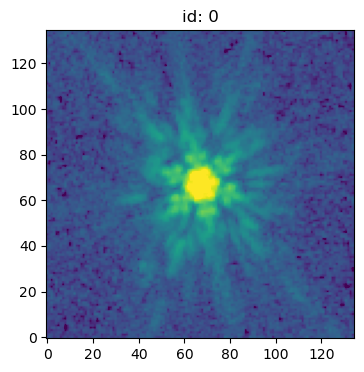

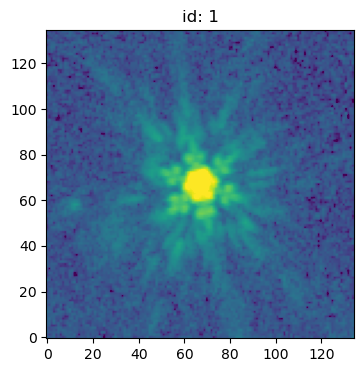

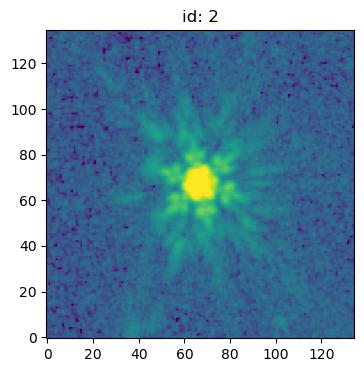

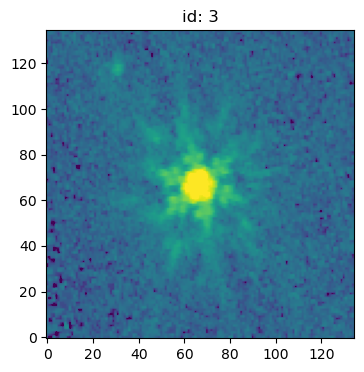

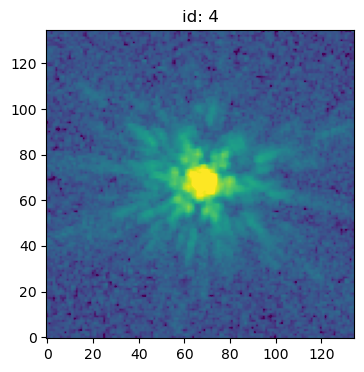

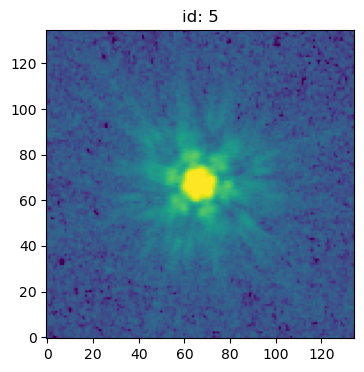

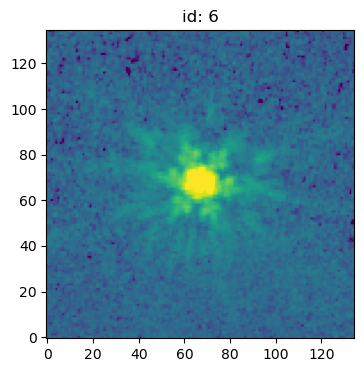

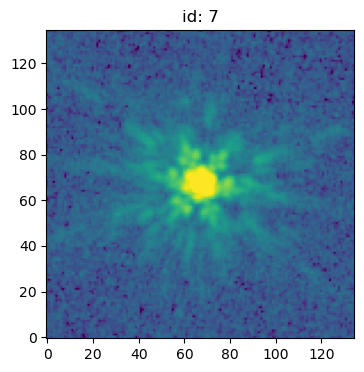

In [17]:
idx_incld = np.asarray([0, 1, 9, 512, 558, 559, 561, 562])

mask = [False for i in range(len(peaks_tbl['x_peak']))]
for ii in range(len(idx_incld)):
    mask[int(idx_incld[ii])] = True
    
stars_tbl = Table()
stars_tbl['x'] = peaks_tbl['x_peak'][mask]  
stars_tbl['y'] = peaks_tbl['y_peak'][mask]

nddata = NDData(data=data_sci)
stars = extract_stars(nddata, stars_tbl, size=psf_size[int(id_fil)]) 

for ii in range(0,len(stars)):
    plt.figure(figsize=(4,4))
    plt.subplot()
    norm = simple_norm(stars[ii], 'log', percent=99.)
    plt.imshow(stars[ii], norm=norm, origin='lower', cmap='viridis')
    plt.title('id: %d' % ii)

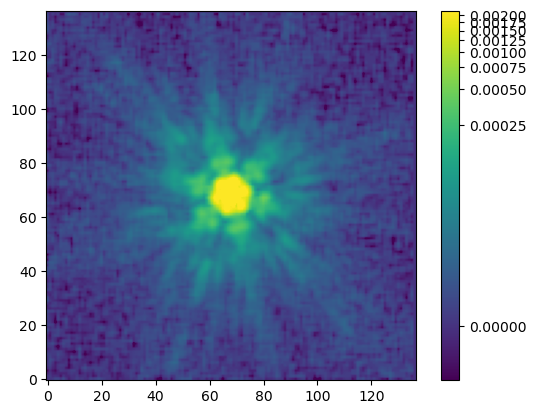

In [18]:
epsf_builder = EPSFBuilder(oversampling=1, maxiters=3, progress_bar=False)  
epsf, fitted_stars = epsf_builder(stars) 

norm = simple_norm(epsf.data, 'log', percent=99.)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
plt.colorbar()

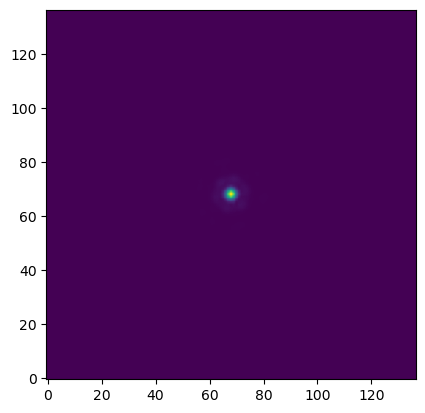

In [19]:
name_out = 'PSF_%s.fits' % fil_names[int(id_fil)]
fits.writeto(name_out, epsf.data, overwrite=True)

hdu = fits.open(name_out)
plt.imshow(hdu[0].data, origin='lower')
hdu.close()

### (12) JWST/F277W

In [20]:
id_fil = 11
print (filters[int(id_fil)])

hdu = fits.open(dir_images+sci_img[filters[int(id_fil)]])
data_sci = hdu[0].data
hdu.close()

hdu = fits.open(dir_images+wht_img[filters[int(id_fil)]])
data_err = 1.0/np.sqrt(hdu[0].data)
hdu.close()

peaks_tbl = find_peaks(data_sci, threshold=100.0, error=data_err) 
peaks_tbl['peak_value'].info.format = '%.8g'  # for consistent table output 
print(peaks_tbl)

print ('Number of stars: %d' % len(peaks_tbl['x_peak']))

jwst_nircam_f277w
x_peak y_peak peak_value
------ ------ ----------
  6507    726  102.17884
  7773   1340  144.74513
  9059   1738   114.8181
  7936   2935  107.83755
  6189   2937  101.48147
  6190   2937  101.48147
  6269   3325    103.216
  7533   3686  100.93311
  7533   3687  100.93311
  7534   3687  100.93311
   ...    ...        ...
  6401   6747  108.19808
  6709   6808  112.32606
  7148   7070  127.48968
  6666   7081  104.21953
  8366   7581   174.4016
  6821   7652  102.78084
  6870   7702  107.46315
  7790   7942  103.80982
  8131   8105  103.25086
  5863   8181  144.60516
  5989   8239  118.21328
Length = 133 rows
Number of stars: 133


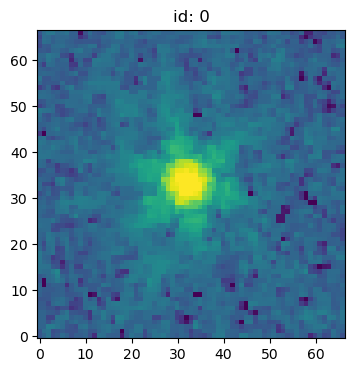

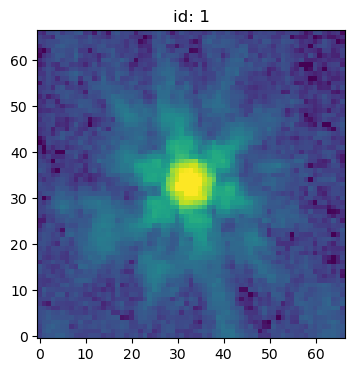

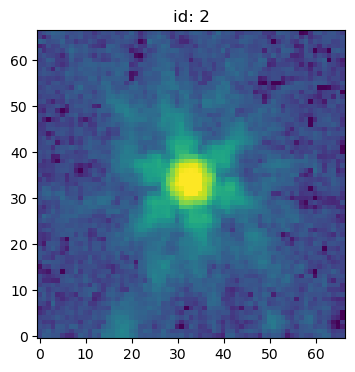

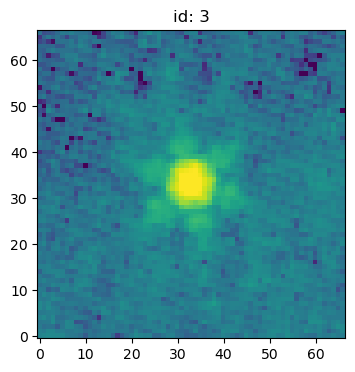

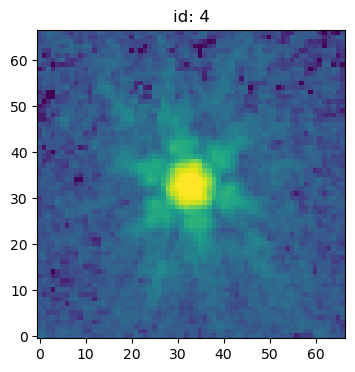

In [22]:
idx_incld = np.asarray([0, 1, 3, 11, 132])

mask = [False for i in range(len(peaks_tbl['x_peak']))]
for ii in range(len(idx_incld)):
    mask[int(idx_incld[ii])] = True
    
stars_tbl = Table()
stars_tbl['x'] = peaks_tbl['x_peak'][mask]  
stars_tbl['y'] = peaks_tbl['y_peak'][mask]

nddata = NDData(data=data_sci)
stars = extract_stars(nddata, stars_tbl, size=psf_size[int(id_fil)]) 

for ii in range(0,len(stars)):
    plt.figure(figsize=(4,4))
    plt.subplot()
    norm = simple_norm(stars[ii], 'log', percent=99.)
    plt.imshow(stars[ii], norm=norm, origin='lower', cmap='viridis')
    plt.title('id: %d' % ii)

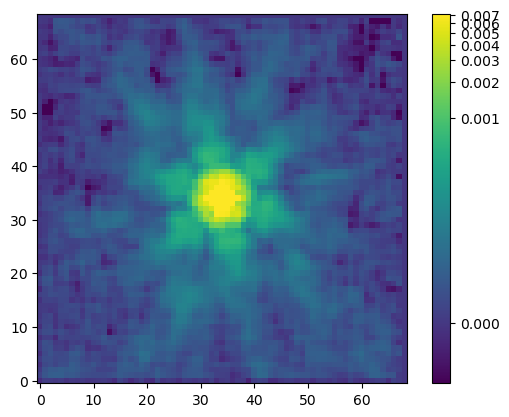

In [23]:
epsf_builder = EPSFBuilder(oversampling=1, maxiters=3, progress_bar=False)  
epsf, fitted_stars = epsf_builder(stars) 

norm = simple_norm(epsf.data, 'log', percent=99.)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
plt.colorbar()

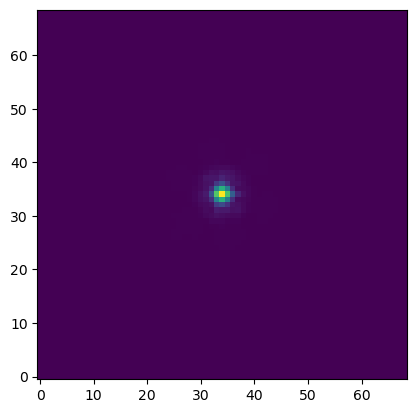

In [24]:
name_out = 'PSF_%s.fits' % fil_names[int(id_fil)]
fits.writeto(name_out, epsf.data, overwrite=True)

hdu = fits.open(name_out)
plt.imshow(hdu[0].data, origin='lower')
hdu.close()

### (13) JWST/F356W

In [27]:
id_fil = 12
print (filters[int(id_fil)])

hdu = fits.open(dir_images+sci_img[filters[int(id_fil)]])
data_sci = hdu[0].data
hdu.close()

hdu = fits.open(dir_images+wht_img[filters[int(id_fil)]])
data_err = 1.0/np.sqrt(hdu[0].data)
hdu.close()

peaks_tbl = find_peaks(data_sci, threshold=120.0, error=data_err) 
peaks_tbl['peak_value'].info.format = '%.8g'  # for consistent table output 
print(peaks_tbl)

print ('Number of stars: %d' % len(peaks_tbl['x_peak']))

jwst_nircam_f356w
x_peak y_peak peak_value
------ ------ ----------
  9375   1801  120.03334
  8446   3340  157.51544
  8139   3404  136.74088
  5751   3859   137.6059
  5753   3860  137.62642
  5756   3862  137.53484
  5766   3862  137.61859
  5763   3863  137.58234
  5773   3863  137.60866
  5769   3864  137.58827
   ...    ...        ...
  8814   4471  183.38966
  8802   4472  121.17011
  8824   4472  175.77586
  8805   4473  127.27802
  8820   4473  180.37225
  8831   4473  178.78372
  8831   4474  178.78372
  5780   4991  168.72017
  6570   5500  129.77861
  8139   6194  146.11314
  5750   8299  148.27373
Length = 678 rows
Number of stars: 678


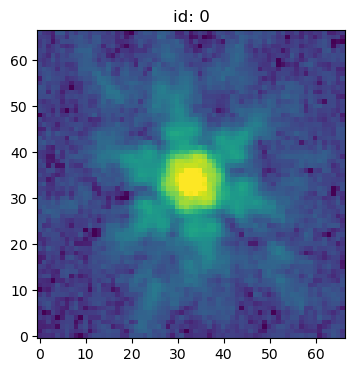

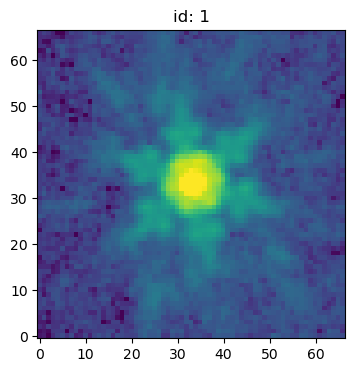

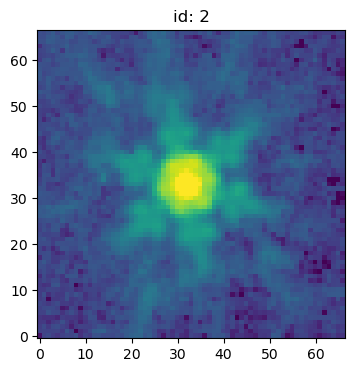

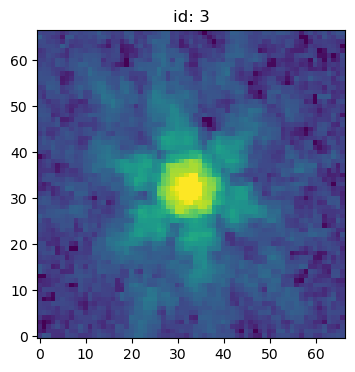

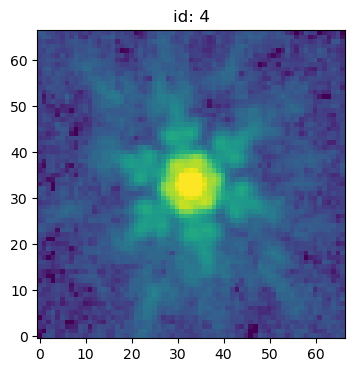

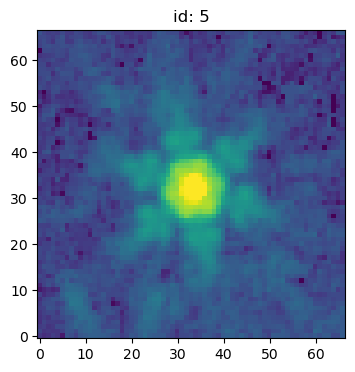

In [29]:
idx_incld = np.asarray([0, 1, 2, 674, 676, 677])

mask = [False for i in range(len(peaks_tbl['x_peak']))]
for ii in range(len(idx_incld)):
    mask[int(idx_incld[ii])] = True
    
stars_tbl = Table()
stars_tbl['x'] = peaks_tbl['x_peak'][mask]  
stars_tbl['y'] = peaks_tbl['y_peak'][mask]

nddata = NDData(data=data_sci)
stars = extract_stars(nddata, stars_tbl, size=psf_size[int(id_fil)]) 

for ii in range(0,len(stars)):
    plt.figure(figsize=(4,4))
    plt.subplot()
    norm = simple_norm(stars[ii], 'log', percent=99.)
    plt.imshow(stars[ii], norm=norm, origin='lower', cmap='viridis')
    plt.title('id: %d' % ii)

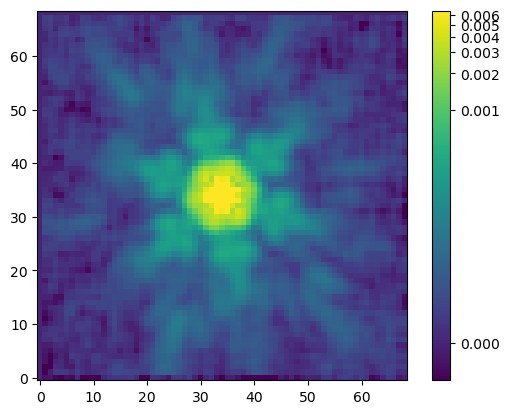

In [30]:
epsf_builder = EPSFBuilder(oversampling=1, maxiters=3, progress_bar=False)  
epsf, fitted_stars = epsf_builder(stars) 

norm = simple_norm(epsf.data, 'log', percent=99.)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
plt.colorbar()

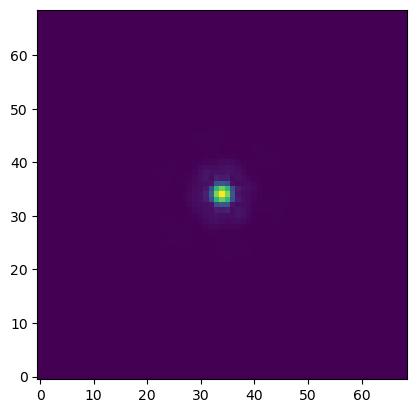

In [31]:
name_out = 'PSF_%s.fits' % fil_names[int(id_fil)]
fits.writeto(name_out, epsf.data, overwrite=True)

hdu = fits.open(name_out)
plt.imshow(hdu[0].data, origin='lower')
hdu.close()

### (14) JWST/F444W

In [35]:
id_fil = 13
print (filters[int(id_fil)])

hdu = fits.open(dir_images+sci_img[filters[int(id_fil)]])
data_sci = hdu[0].data
hdu.close()

hdu = fits.open(dir_images+wht_img[filters[int(id_fil)]])
data_err = 1.0/np.sqrt(hdu[0].data)
hdu.close()

peaks_tbl = find_peaks(data_sci, threshold=80.0, error=data_err) 
peaks_tbl['peak_value'].info.format = '%.8g'  # for consistent table output 
print(peaks_tbl)

print ('Number of stars: %d' % len(peaks_tbl['x_peak']))

jwst_nircam_f444w
x_peak y_peak peak_value
------ ------ ----------
  7988   1334  100.65073
  6269   3325  105.88028
  8447   3340  88.039467
  8138   3404   88.73465
  9011   3486  85.591743
  9016   3486  96.734467
  9016   3487  96.734467
  8908   4374  81.699974
  8910   4379  100.03454
  8914   4385  83.771027
   ...    ...        ...
  6571   5502  85.224998
  6796   5590  151.76241
  6253   5656  136.38606
  7327   6089  90.692215
  7328   6089  90.692215
  6251   6341  95.993355
  8130   6662  141.53204
  5153   7591  119.70832
  6870   7702  82.894501
  5279   7967   105.7961
  5751   8298  89.810448
Length = 43 rows
Number of stars: 43


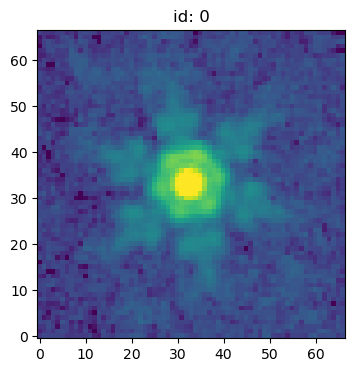

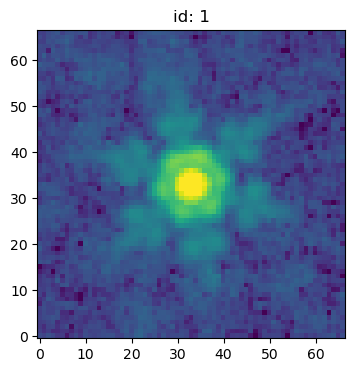

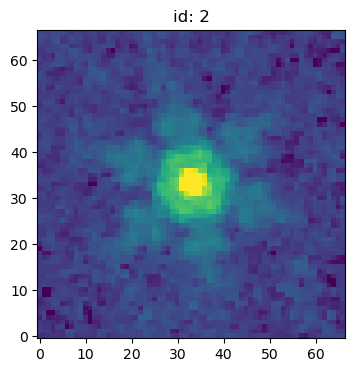

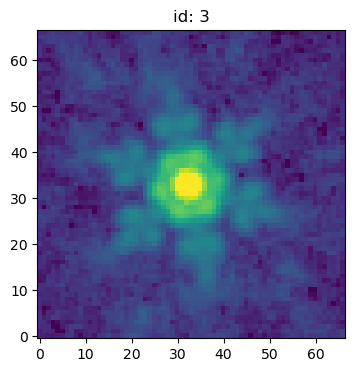

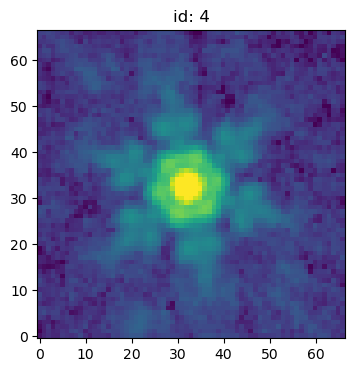

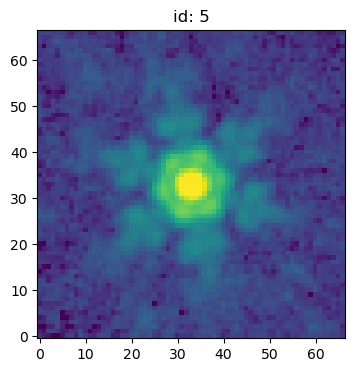

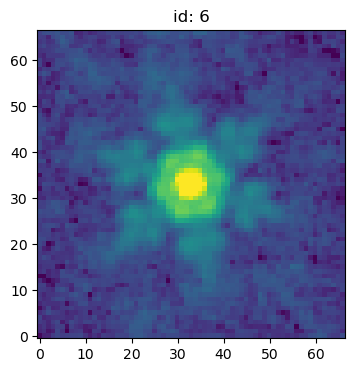

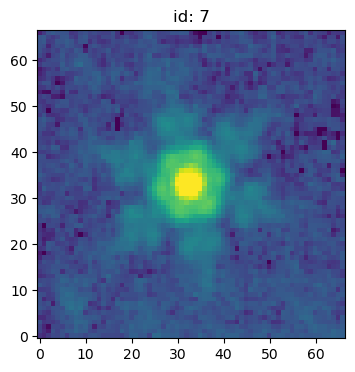

In [37]:
idx_incld = np.asarray([2, 3, 23, 33, 38, 39, 41, 42])

mask = [False for i in range(len(peaks_tbl['x_peak']))]
for ii in range(len(idx_incld)):
    mask[int(idx_incld[ii])] = True
    
stars_tbl = Table()
stars_tbl['x'] = peaks_tbl['x_peak'][mask]  
stars_tbl['y'] = peaks_tbl['y_peak'][mask]

nddata = NDData(data=data_sci)
stars = extract_stars(nddata, stars_tbl, size=psf_size[int(id_fil)]) 

for ii in range(0,len(stars)):
    plt.figure(figsize=(4,4))
    plt.subplot()
    norm = simple_norm(stars[ii], 'log', percent=99.)
    plt.imshow(stars[ii], norm=norm, origin='lower', cmap='viridis')
    plt.title('id: %d' % ii)

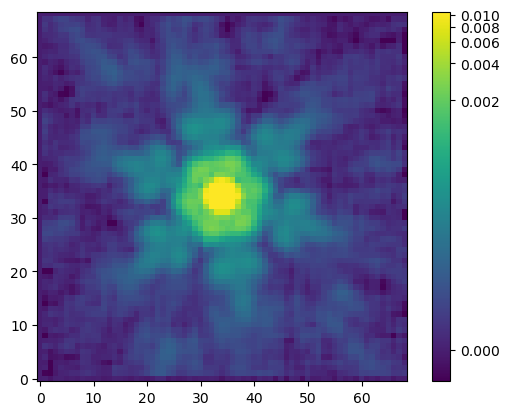

In [38]:
epsf_builder = EPSFBuilder(oversampling=1, maxiters=3, progress_bar=False)  
epsf, fitted_stars = epsf_builder(stars) 

norm = simple_norm(epsf.data, 'log', percent=99.)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
plt.colorbar()

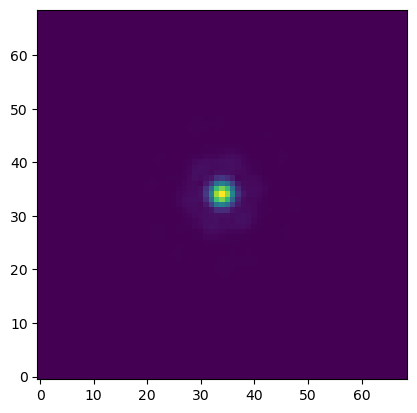

In [39]:
name_out = 'PSF_%s.fits' % fil_names[int(id_fil)]
fits.writeto(name_out, epsf.data, overwrite=True)

hdu = fits.open(name_out)
plt.imshow(hdu[0].data, origin='lower')
hdu.close()

### (15) JWST/F480M

In [40]:
id_fil = 14
print (filters[int(id_fil)])

hdu = fits.open(dir_images+sci_img[filters[int(id_fil)]])
data_sci = hdu[0].data
hdu.close()

hdu = fits.open(dir_images+wht_img[filters[int(id_fil)]])
data_err = 1.0/np.sqrt(hdu[0].data)
hdu.close()

peaks_tbl = find_peaks(data_sci, threshold=80.0, error=data_err) 
peaks_tbl['peak_value'].info.format = '%.8g'  # for consistent table output 
print(peaks_tbl)

print ('Number of stars: %d' % len(peaks_tbl['x_peak']))

jwst_nircam_f480m
x_peak y_peak peak_value
------ ------ ----------
  5935   5434  149.76509
  6583   5465  135.16153
  6578   5467  167.13902
  6563   5468  144.05466
  6568   5469  193.57837
  6583   5470  156.87851
  6563   5473  168.34746
  6573   5473  81.656479
  6574   5473  81.656479
  6579   5473  151.62872
   ...    ...        ...
  6408   6734  161.05615
  6397   6736  173.50462
  6409   6741  168.23096
  6398   6743  170.00662
  6404   6746  133.29118
  7236   6775  320.98141
  2650   6878   357.3707
  3810   8007   131.3918
  5976   8399  95.088745
  4449   8482  148.11137
  4126   8693  140.77995
Length = 50 rows
Number of stars: 50


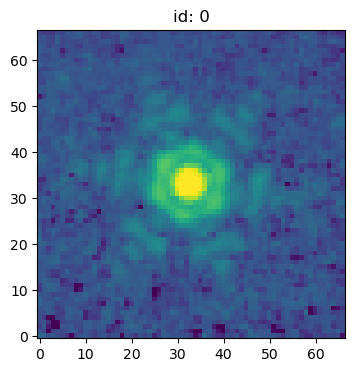

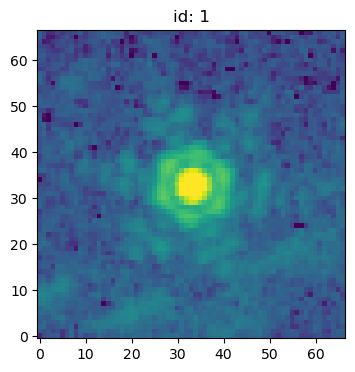

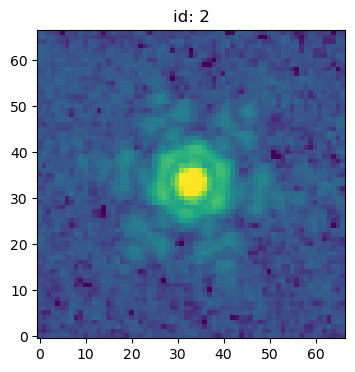

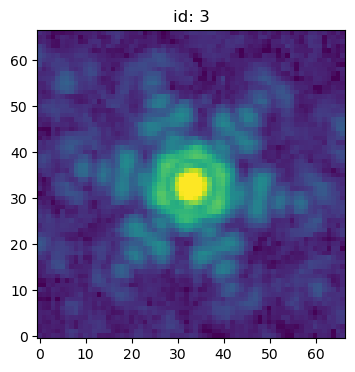

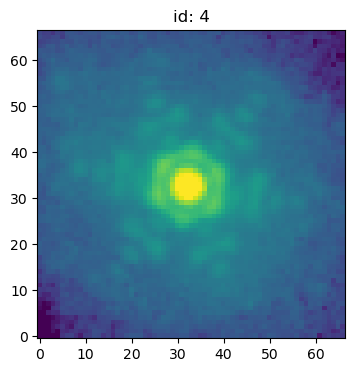

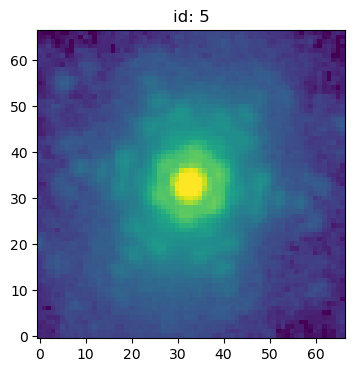

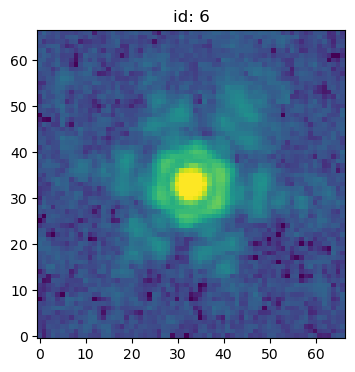

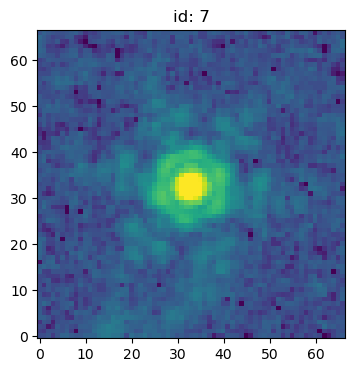

In [42]:
idx_incld = np.asarray([0, 30, 36, 37, 44, 45, 46, 47])

mask = [False for i in range(len(peaks_tbl['x_peak']))]
for ii in range(len(idx_incld)):
    mask[int(idx_incld[ii])] = True
    
stars_tbl = Table()
stars_tbl['x'] = peaks_tbl['x_peak'][mask]  
stars_tbl['y'] = peaks_tbl['y_peak'][mask]

nddata = NDData(data=data_sci)
stars = extract_stars(nddata, stars_tbl, size=psf_size[int(id_fil)]) 

for ii in range(0,len(stars)):
    plt.figure(figsize=(4,4))
    plt.subplot()
    norm = simple_norm(stars[ii], 'log', percent=99.)
    plt.imshow(stars[ii], norm=norm, origin='lower', cmap='viridis')
    plt.title('id: %d' % ii)

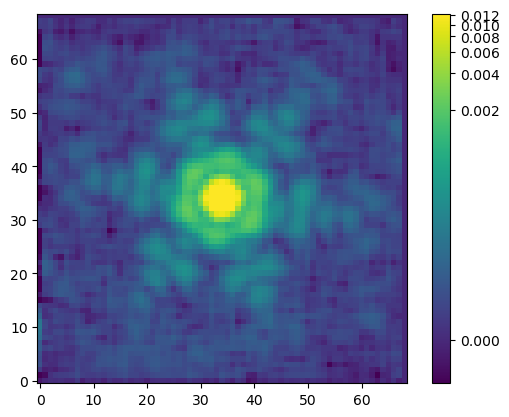

In [43]:
epsf_builder = EPSFBuilder(oversampling=1, maxiters=3, progress_bar=False)  
epsf, fitted_stars = epsf_builder(stars) 

norm = simple_norm(epsf.data, 'log', percent=99.)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
plt.colorbar()

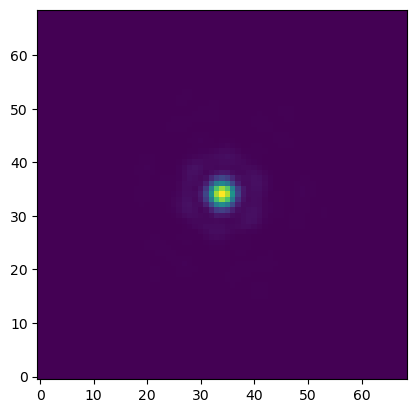

In [44]:
name_out = 'PSF_%s.fits' % fil_names[int(id_fil)]
fits.writeto(name_out, epsf.data, overwrite=True)

hdu = fits.open(name_out)
plt.imshow(hdu[0].data, origin='lower')
hdu.close()